## How to Use This Notebook
This notebook downloads the dataset from Kaggle using the Kaggle API.
To run this notebook, follow these steps:

1. Create a Kaggle account (it's free) at [https://www.kaggle.com/](https://www.kaggle.com/).
2. Go to your **Profile → Settings** and scroll down to the **API section**.
3. Click **Create New API Token** to download `kaggle.json`.
4. Move `kaggle.json` to:
   - **Windows**: `%HOMEPATH%\.kaggle\`
   - **macOS/Linux**: `~/.kaggle/`
5. Run the notebook!


In case you have problems with step #4 above, locating the %HOMEPATH%\.kaggle\ folder on your Windows laptop, please refer to the guidance from ChatGPT on the screenshot below (worked for me):

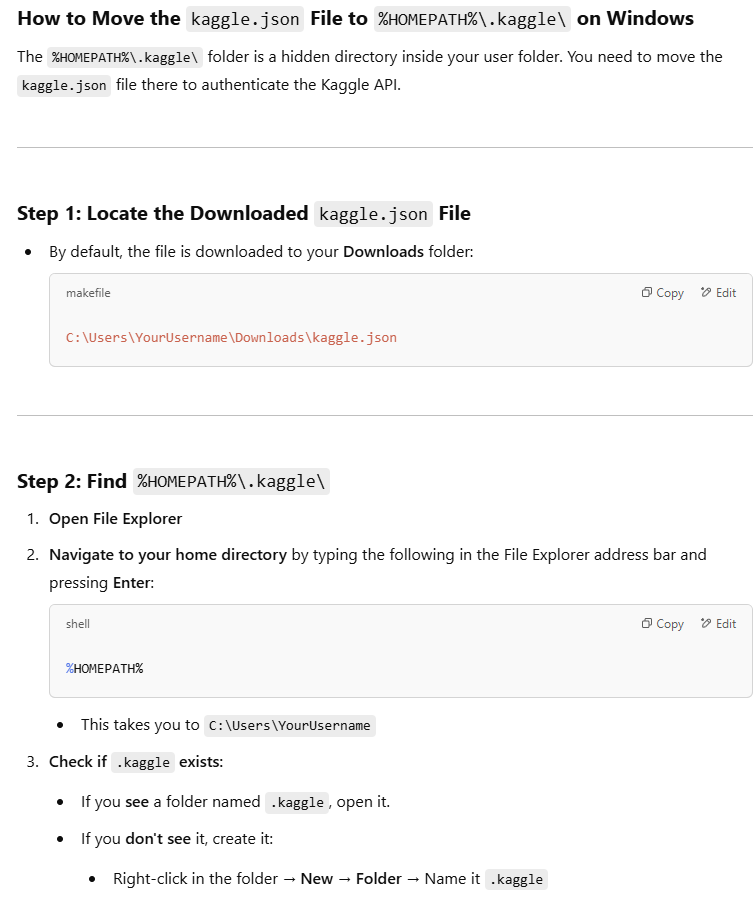

## Data Sourcing, Data Preparation and Exploratory Data Analysis (EDA)

In [113]:
!pip install kaggle

In [114]:
import zipfile

In [115]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content"  # Change this if using local Jupyter

# Download dataset
!kaggle datasets download -d felixzhao/productdemandforecasting

# Define the path to the downloaded zip file
zip_path = "productdemandforecasting.zip"

# Extract the zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(".")

print("Unzipping complete.")

Dataset URL: https://www.kaggle.com/datasets/felixzhao/productdemandforecasting
License(s): GPL-2.0
productdemandforecasting.zip: Skipping, found more recently modified local copy (use --force to force download)
Unzipping complete.


In [116]:
import pandas as pd

df = pd.read_csv("Historical Product Demand.csv")
df.head()

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
0,Product_0993,Whse_J,Category_028,2012/7/27,100
1,Product_0979,Whse_J,Category_028,2012/1/19,500
2,Product_0979,Whse_J,Category_028,2012/2/3,500
3,Product_0979,Whse_J,Category_028,2012/2/9,500
4,Product_0979,Whse_J,Category_028,2012/3/2,500


In [117]:
df.tail()

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
1048570,Product_1791,Whse_J,Category_006,2016/4/27,1000
1048571,Product_1974,Whse_J,Category_006,2016/4/27,1
1048572,Product_1787,Whse_J,Category_006,2016/4/28,2500
1048573,Product_0901,Whse_J,Category_023,2016/10/7,50
1048574,Product_0704,Whse_J,Category_001,2016/6/27,4


In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 5 columns):
 #   Column            Non-Null Count    Dtype 
---  ------            --------------    ----- 
 0   Product_Code      1048575 non-null  object
 1   Warehouse         1048575 non-null  object
 2   Product_Category  1048575 non-null  object
 3   Date              1037336 non-null  object
 4   Order_Demand      1048575 non-null  object
dtypes: object(5)
memory usage: 40.0+ MB


There were approximately 11 thousand rows with null or NaN data in the Date column (approx 1% of the total dataset) and we've decided to remove them.

In [119]:
df = df.dropna(subset=['Date'])

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1037336 entries, 0 to 1048574
Data columns (total 5 columns):
 #   Column            Non-Null Count    Dtype 
---  ------            --------------    ----- 
 0   Product_Code      1037336 non-null  object
 1   Warehouse         1037336 non-null  object
 2   Product_Category  1037336 non-null  object
 3   Date              1037336 non-null  object
 4   Order_Demand      1037336 non-null  object
dtypes: object(5)
memory usage: 47.5+ MB


There were also some rows where demand was zero or negative (values in brackets in the Order_Demand) column.

In [121]:
df.iloc[112288:112310]

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
112289,Product_2169,Whse_A,Category_024,2012/7/6,1
112290,Product_2169,Whse_A,Category_024,2012/8/9,(1)
112291,Product_1672,Whse_A,Category_026,2012/2/23,20
112292,Product_1669,Whse_A,Category_026,2012/3/13,40
112293,Product_1672,Whse_A,Category_026,2012/3/13,40
112294,Product_1672,Whse_A,Category_026,2012/3/19,50
112295,Product_1671,Whse_A,Category_026,2012/4/24,30
112296,Product_1669,Whse_A,Category_026,2012/7/23,50
112297,Product_1671,Whse_A,Category_026,2012/9/13,20
112298,Product_1669,Whse_A,Category_026,2012/10/24,50


In [122]:
'''Convert (negative) values within brackets to values preceded by negative sign'''
df['Order_Demand'] = df['Order_Demand'].replace(r'\((\d+)\)', r'-\1', regex=True)  # Replace () with - sign

In [123]:
df.iloc[112288:112310]

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
112289,Product_2169,Whse_A,Category_024,2012/7/6,1
112290,Product_2169,Whse_A,Category_024,2012/8/9,-1
112291,Product_1672,Whse_A,Category_026,2012/2/23,20
112292,Product_1669,Whse_A,Category_026,2012/3/13,40
112293,Product_1672,Whse_A,Category_026,2012/3/13,40
112294,Product_1672,Whse_A,Category_026,2012/3/19,50
112295,Product_1671,Whse_A,Category_026,2012/4/24,30
112296,Product_1669,Whse_A,Category_026,2012/7/23,50
112297,Product_1671,Whse_A,Category_026,2012/9/13,20
112298,Product_1669,Whse_A,Category_026,2012/10/24,50


Now the Order_Demand column is ready to be converted into Float datatype

In [124]:
df['Order_Demand'] = df['Order_Demand'].astype(float)

In [125]:
df.iloc[112288:112310]

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
112289,Product_2169,Whse_A,Category_024,2012/7/6,1.0
112290,Product_2169,Whse_A,Category_024,2012/8/9,-1.0
112291,Product_1672,Whse_A,Category_026,2012/2/23,20.0
112292,Product_1669,Whse_A,Category_026,2012/3/13,40.0
112293,Product_1672,Whse_A,Category_026,2012/3/13,40.0
112294,Product_1672,Whse_A,Category_026,2012/3/19,50.0
112295,Product_1671,Whse_A,Category_026,2012/4/24,30.0
112296,Product_1669,Whse_A,Category_026,2012/7/23,50.0
112297,Product_1671,Whse_A,Category_026,2012/9/13,20.0
112298,Product_1669,Whse_A,Category_026,2012/10/24,50.0


In [126]:
'''Convert the Date column to datetime format'''
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1037336 entries, 0 to 1048574
Data columns (total 5 columns):
 #   Column            Non-Null Count    Dtype         
---  ------            --------------    -----         
 0   Product_Code      1037336 non-null  object        
 1   Warehouse         1037336 non-null  object        
 2   Product_Category  1037336 non-null  object        
 3   Date              1037336 non-null  datetime64[ns]
 4   Order_Demand      1037336 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 47.5+ MB


In [128]:
df.head()

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
0,Product_0993,Whse_J,Category_028,2012-07-27,100.0
1,Product_0979,Whse_J,Category_028,2012-01-19,500.0
2,Product_0979,Whse_J,Category_028,2012-02-03,500.0
3,Product_0979,Whse_J,Category_028,2012-02-09,500.0
4,Product_0979,Whse_J,Category_028,2012-03-02,500.0


In [129]:
# Add a 'Year' column by extracting the year from the 'Date' column
df['Year'] = df['Date'].dt.year

In [130]:
# Add a 'Month' column by extracting the month name from the 'Date' column
df['Month'] = df['Date'].dt.month_name()

In [131]:
df.head()

,Product_Code,Warehouse,Product_Category,Date,Order_Demand,Year,Month
0,Product_0993,Whse_J,Category_028,2012-07-27,100.0,2012,July
1,Product_0979,Whse_J,Category_028,2012-01-19,500.0,2012,January
2,Product_0979,Whse_J,Category_028,2012-02-03,500.0,2012,February
3,Product_0979,Whse_J,Category_028,2012-02-09,500.0,2012,February
4,Product_0979,Whse_J,Category_028,2012-03-02,500.0,2012,March


In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1037336 entries, 0 to 1048574
Data columns (total 7 columns):
 #   Column            Non-Null Count    Dtype         
---  ------            --------------    -----         
 0   Product_Code      1037336 non-null  object        
 1   Warehouse         1037336 non-null  object        
 2   Product_Category  1037336 non-null  object        
 3   Date              1037336 non-null  datetime64[ns]
 4   Order_Demand      1037336 non-null  float64       
 5   Year              1037336 non-null  int32         
 6   Month             1037336 non-null  object        
dtypes: datetime64[ns](1), float64(1), int32(1), object(4)
memory usage: 59.4+ MB


Check how many records had 0 or negative demand units

In [133]:
(df['Order_Demand'] <= 0).sum()

np.int64(34571)

This is only about 3% of the total dataset, so we've decided to remove the records with 0 or negative order demand values.

In [134]:
df = df[df['Order_Demand'] > 0]

In [135]:
df.head()

,Product_Code,Warehouse,Product_Category,Date,Order_Demand,Year,Month
0,Product_0993,Whse_J,Category_028,2012-07-27,100.0,2012,July
1,Product_0979,Whse_J,Category_028,2012-01-19,500.0,2012,January
2,Product_0979,Whse_J,Category_028,2012-02-03,500.0,2012,February
3,Product_0979,Whse_J,Category_028,2012-02-09,500.0,2012,February
4,Product_0979,Whse_J,Category_028,2012-03-02,500.0,2012,March


In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1002765 entries, 0 to 1048574
Data columns (total 7 columns):
 #   Column            Non-Null Count    Dtype         
---  ------            --------------    -----         
 0   Product_Code      1002765 non-null  object        
 1   Warehouse         1002765 non-null  object        
 2   Product_Category  1002765 non-null  object        
 3   Date              1002765 non-null  datetime64[ns]
 4   Order_Demand      1002765 non-null  float64       
 5   Year              1002765 non-null  int32         
 6   Month             1002765 non-null  object        
dtypes: datetime64[ns](1), float64(1), int32(1), object(4)
memory usage: 57.4+ MB


We've removed the Warehouse column as we did not need warehouse level detail/breakdown for the model

In [137]:
# Group by 'Product_Code', 'Product_Category', 'Year' and 'Month' and sum 'Order_Demand'
df = df.groupby(['Product_Code', 'Product_Category', 'Year', 'Month'], as_index=False)['Order_Demand'].sum()

In [138]:
df.head()

,Product_Code,Product_Category,Year,Month,Order_Demand
0,Product_0001,Category_005,2011,December,300.0
1,Product_0001,Category_005,2012,April,3300.0
2,Product_0001,Category_005,2012,August,9300.0
3,Product_0001,Category_005,2012,December,6000.0
4,Product_0001,Category_005,2012,February,13000.0


In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105524 entries, 0 to 105523
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Product_Code      105524 non-null  object 
 1   Product_Category  105524 non-null  object 
 2   Year              105524 non-null  int32  
 3   Month             105524 non-null  object 
 4   Order_Demand      105524 non-null  float64
dtypes: float64(1), int32(1), object(3)
memory usage: 3.6+ MB


As a result of (i) removing the warehouse level details and grouping the dataframe by product code, product category, year and month, we've reduced the size of the dataframe from approximately 1 million rows to approximately 106 thousand rows. This is also because the original dataframe had many rows with the same product code and demand date, which were aggregated now into one row.

In [140]:
df['Order_Demand'].sum()

np.float64(5119013081.0)

## Adding Order Backlog, Channel Inventory, and High Season columns (as part of Data Preparation)

In [141]:
import numpy as np

We enrich the dataset by adding attributes, such as (i) order backlog level, (ii) channel inventory level and (iii) high season binary attribute (this one will be added later) and populating these columns with synthetic data later.

In [142]:
# Adding the 'Order_Backlog' column with float type, initially set to NaN
df['Order_Backlog'] = np.nan

# Adding the 'Channel_Inventory' column with float type, initially set to NaN
df['Channel_Inventory'] = np.nan

In [143]:
df.head()

,Product_Code,Product_Category,Year,Month,Order_Demand,Order_Backlog,Channel_Inventory
0,Product_0001,Category_005,2011,December,300.0,NaN,NaN
1,Product_0001,Category_005,2012,April,3300.0,NaN,NaN
2,Product_0001,Category_005,2012,August,9300.0,NaN,NaN
3,Product_0001,Category_005,2012,December,6000.0,NaN,NaN
4,Product_0001,Category_005,2012,February,13000.0,NaN,NaN


In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105524 entries, 0 to 105523
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Product_Code       105524 non-null  object 
 1   Product_Category   105524 non-null  object 
 2   Year               105524 non-null  int32  
 3   Month              105524 non-null  object 
 4   Order_Demand       105524 non-null  float64
 5   Order_Backlog      0 non-null       float64
 6   Channel_Inventory  0 non-null       float64
dtypes: float64(3), int32(1), object(3)
memory usage: 5.2+ MB


In [145]:
# Converts the values in the "Year" column to integers (for easier subsequent processing / date calculation)
df['Year'] = df['Year'].astype(int)

In [146]:
# Convert the month names in the Month column to numerical values (by adding a Month_Num column) for easier subsequent processing / date calculation
month_map = {m: i for i, m in enumerate([
    "January", "February", "March", "April", "May", "June", "July", "August",
    "September", "October", "November", "December"], 1)}
df['Month_Num'] = df['Month'].map(month_map)

In [147]:
print(df.columns)

Index(['Product_Code', 'Product_Category', 'Year', 'Month', 'Order_Demand',
       'Order_Backlog', 'Channel_Inventory', 'Month_Num'],
      dtype='object')


In [148]:
'''Identify partial years, i.e. in which years do we have full year data in the dataframe'''
df.groupby('Year').count()

,Product_Code,Product_Category,Month,Order_Demand,Order_Backlog,Channel_Inventory,Month_Num
Year,,,,,,,
2011,302,302,302,302,0,0,302
2012,19519,19519,19519,19519,0,0,19519
2013,20468,20468,20468,20468,0,0,20468
2014,21390,21390,21390,21390,0,0,21390
2015,22093,22093,22093,22093,0,0,22093
2016,21707,21707,21707,21707,0,0,21707
2017,45,45,45,45,0,0,45


In [149]:
'''Keep only records where Year is between 2012 and 2016 (i.e. where we have full year data)'''
df = df[(df['Year'] >= 2012) & (df['Year'] <= 2016)]

In [150]:
df.groupby('Year').count()

,Product_Code,Product_Category,Month,Order_Demand,Order_Backlog,Channel_Inventory,Month_Num
Year,,,,,,,
2012,19519,19519,19519,19519,0,0,19519
2013,20468,20468,20468,20468,0,0,20468
2014,21390,21390,21390,21390,0,0,21390
2015,22093,22093,22093,22093,0,0,22093
2016,21707,21707,21707,21707,0,0,21707


Exploratory data analysis: check total order demand values (across all product categories/codes) by year/month in order to guide us to populate the High Season column (once added).

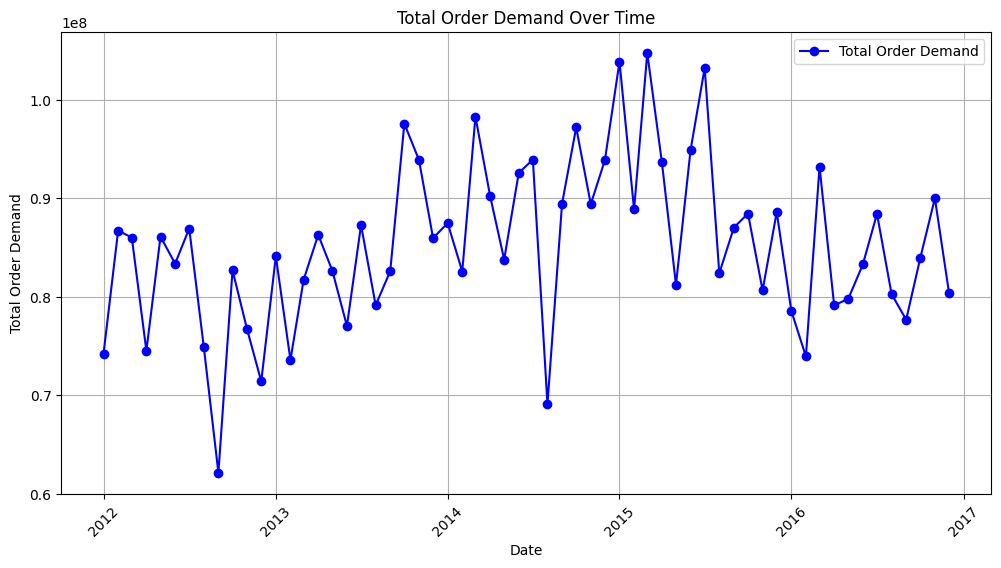

In [151]:
# Also add 'Date' column (derived from the Year and Month columns) setting the day to the first day of the month (thus being able to aggregate data by month) 
df['Date'] = pd.to_datetime(df.apply(lambda row: f"{row['Year']}-{row['Month_Num']:02d}-01", axis=1))

import matplotlib.pyplot as plt

# Group by Date and sum Order_Demand
df_aggregated = df.groupby('Date')['Order_Demand'].sum().reset_index()

# Create figure and axis
plt.figure(figsize=(12, 6))

# Plot line chart
plt.plot(df_aggregated['Date'], df_aggregated['Order_Demand'], marker='o', linestyle='-', color='blue', label="Total Order Demand")

# Formatting
plt.xlabel("Date")
plt.ylabel("Total Order Demand")
plt.title("Total Order Demand Over Time")
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.legend()
plt.grid(True)

# Show plot
plt.show()

In [152]:
df.head()

,Product_Code,Product_Category,Year,Month,Order_Demand,Order_Backlog,Channel_Inventory,Month_Num,Date
1,Product_0001,Category_005,2012,April,3300.0,NaN,NaN,4,2012-04-01
2,Product_0001,Category_005,2012,August,9300.0,NaN,NaN,8,2012-08-01
3,Product_0001,Category_005,2012,December,6000.0,NaN,NaN,12,2012-12-01
4,Product_0001,Category_005,2012,February,13000.0,NaN,NaN,2,2012-02-01
5,Product_0001,Category_005,2012,January,9700.0,NaN,NaN,1,2012-01-01


We continue our exploratory data analysis to guide us to populate the High Season column by checking total order demand values by month (aggregated across the various years).

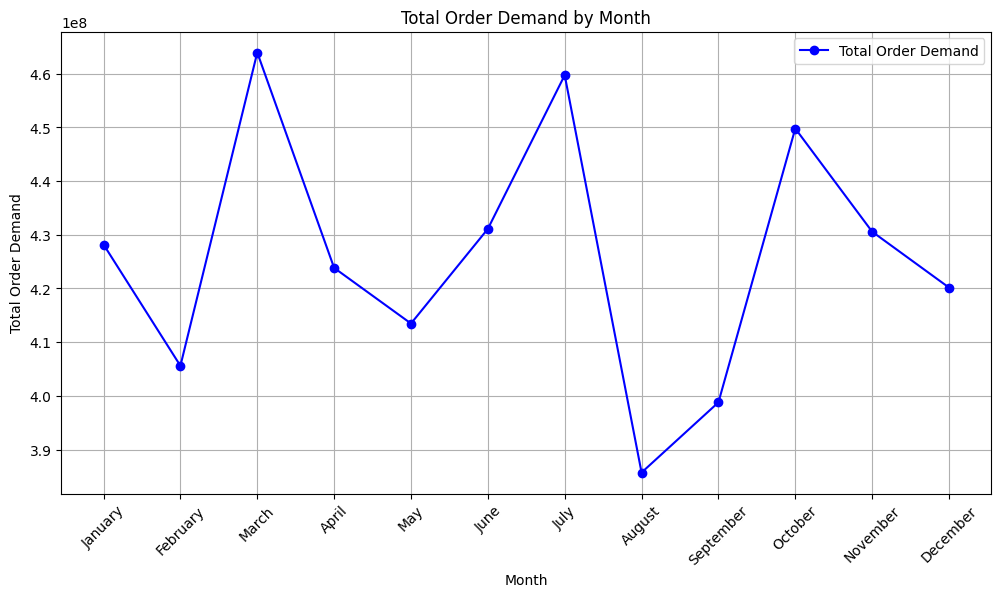

In [153]:
# Group by Month (aggregated across the various years) and sum Order_Demand
df_aggregated2 = df.groupby('Month_Num')['Order_Demand'].sum().reset_index()

# Sort by Month_Num to ensure correct order (January = 1, February = 2, etc.)
df_aggregated2 = df_aggregated2.sort_values('Month_Num')

# Mapping for proper month labels
month_labels = ["January", "February", "March", "April", "May", "June", 
                "July", "August", "September", "October", "November", "December"]
df_aggregated2['Month'] = df_aggregated2['Month_Num'].astype(int).map(lambda x: month_labels[x - 1])

# Create figure and axis
plt.figure(figsize=(12, 6))

# Plot line chart
plt.plot(df_aggregated2['Month'], df_aggregated2['Order_Demand'], marker='o', linestyle='-', color='blue', label="Total Order Demand")

# Formatting
plt.xlabel("Month")
plt.ylabel("Total Order Demand")
plt.title("Total Order Demand by Month")
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.legend()
plt.grid(True)

# Show plot
plt.show()

## Populate the High Season column (as part of the Data Preparation)

We're going to add the High Season column to the dataframe (as a binary classifier 1 meaning "yes" and 0 meaning "no) and based on the exploratory data analysis (EDA), we're going to define March, July and October as high season months.

In [154]:
# Adding the 'High_Season' column as a binary classifier (0 or 1)
df['High_Season'] = df['Month'].isin(['March', 'July', 'October']).astype(int) # Based on above EDA, set the months March, July and October high season

## Populate the Channel Inventory column (as part of the Data Preparation)

First we create a version of the dataframe aggregated by product category and date (i.e. month). This will be necessary in order to calculate rolling next 3-month (i.e. forward looking) order demand by product category and month (to subsequently populate the channel inventory column in the dataframe by synthetic values).

In [155]:
from IPython.display import display

# Aggregate Order_Demand at Product_Category and Date level
df_grouped = df.groupby(['Product_Category', 'Date'])['Order_Demand'].sum().reset_index()

# Ensure 'Date' is in datetime format
df_grouped['Date'] = pd.to_datetime(df_grouped['Date'])

# Create a complete timeline for each Product_Category
all_dates = pd.date_range(start=df_grouped['Date'].min(), end=df_grouped['Date'].max(), freq='MS')  # 'MS' ensures month start

# Create a template dataframe to ensure all months are included for each Product_Category
product_categories = df_grouped['Product_Category'].unique()
template = pd.MultiIndex.from_product([product_categories, all_dates], names=['Product_Category', 'Date']).to_frame(index=False)

# Merge with original df_grouped and fill missing Order_Demand with 0
df_grouped = template.merge(df_grouped, on=['Product_Category', 'Date'], how='left').fillna({'Order_Demand': 0})

# Compute 3-month forward-looking rolling sum within each Product_Category
df_grouped['Rolling_Sum'] = (
    df_grouped.sort_values(['Product_Category', 'Date'])  # Ensure correct order
    .groupby('Product_Category')['Order_Demand']
    .apply(lambda x: x.rolling(window=3, min_periods=1).sum().shift(-2))  # Shift by -2 for forward-looking sum
    .reset_index(drop=True)  # Reset index for clean merge
)

# Replace NaN values in Rolling_Sum with Order_Demand * 3
df_grouped['Rolling_Sum'].fillna(df_grouped['Order_Demand'] * 3, inplace=True)

C:\Users\mzsot\AppData\Local\Temp\ipykernel_3692\1359044526.py:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_grouped['Rolling_Sum'].fillna(df_grouped['Order_Demand'] * 3, inplace=True)


In [156]:
df_grouped.tail(60)

,Product_Category,Date,Order_Demand,Rolling_Sum
1920,Category_033,2012-01-01,600000.0,2030000.0
1921,Category_033,2012-02-01,900000.0,2260000.0
1922,Category_033,2012-03-01,530000.0,2290000.0
1923,Category_033,2012-04-01,830000.0,2640000.0
1924,Category_033,2012-05-01,930000.0,2520000.0
1925,Category_033,2012-06-01,880000.0,2290000.0
1926,Category_033,2012-07-01,710000.0,2110000.0
1927,Category_033,2012-08-01,700000.0,2180000.0
1928,Category_033,2012-09-01,700000.0,2230000.0
1929,Category_033,2012-10-01,780000.0,2250000.0


Now we calculate the channel inventory in this higher (product category) level dataframe for each product category / month combination by applying a reverse relationship with the next 3 month rolling demand and scaling it between 0 and 1 (i.e. for those months where the next 3 month demand was high for the product category, the channel inventory scaling will be closer to 0 (low inventory levels in the distribution channels) and vice versa.

In [157]:
# Compute Channel_Inventory using reverse min-max scaling within each Product_Category
df_grouped['Channel_Inventory'] = (
    df_grouped.groupby('Product_Category')['Rolling_Sum']
    .transform(lambda x: (x.max() - x) / (x.max() - x.min()) if x.max() > x.min() else 0.5)  # Avoid division by zero
)

As in real life the correlation between channel inventory levels and future order levels is not perfect at -1, we'll also add some random noise to this synthetically generated channel inventory data and we'll also make sure these channel inventory values will be rounded to 1 decimal (because in reality the users of the model would most likely score the channel inventory values of the product categories between 0 and 1 with 1 decimal precision).

In [158]:
# Set random seed for reproducibility
np.random.seed(42)

# Define the noise range
noise = np.random.uniform(-0.1, 0.1, size=len(df_grouped))

# Apply noise while ensuring values stay within [0,1]
df_grouped['Channel_Inventory'] = (df_grouped['Channel_Inventory'] + noise).clip(0, 1).round(1)

In [159]:
df_grouped.head(15)

,Product_Category,Date,Order_Demand,Rolling_Sum,Channel_Inventory
0,Category_001,2012-01-01,22172.0,78040.0,0.7
1,Category_001,2012-02-01,25866.0,76828.0,0.8
2,Category_001,2012-03-01,30002.0,71353.0,0.9
3,Category_001,2012-04-01,20960.0,62565.0,1.0
4,Category_001,2012-05-01,20391.0,61918.0,0.9
5,Category_001,2012-06-01,21214.0,59686.0,0.9
6,Category_001,2012-07-01,20313.0,58336.0,0.9
7,Category_001,2012-08-01,18159.0,65671.0,1.0
8,Category_001,2012-09-01,19864.0,72590.0,0.8
9,Category_001,2012-10-01,27648.0,73997.0,0.8


In [160]:
df_grouped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1980 entries, 0 to 1979
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Product_Category   1980 non-null   object        
 1   Date               1980 non-null   datetime64[ns]
 2   Order_Demand       1980 non-null   float64       
 3   Rolling_Sum        1980 non-null   float64       
 4   Channel_Inventory  1980 non-null   float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 77.5+ KB


The length of the df_grouped dataset makes sense: 33 product categories * 5 years * 12 months = 1,980 records

In [161]:
df.head()

,Product_Code,Product_Category,Year,Month,Order_Demand,Order_Backlog,Channel_Inventory,Month_Num,Date,High_Season
1,Product_0001,Category_005,2012,April,3300.0,NaN,NaN,4,2012-04-01,0
2,Product_0001,Category_005,2012,August,9300.0,NaN,NaN,8,2012-08-01,0
3,Product_0001,Category_005,2012,December,6000.0,NaN,NaN,12,2012-12-01,0
4,Product_0001,Category_005,2012,February,13000.0,NaN,NaN,2,2012-02-01,0
5,Product_0001,Category_005,2012,January,9700.0,NaN,NaN,1,2012-01-01,0


Now we need to make sure the channel inventory values in the df_grouped dataset (calculated on product category level) will get cascaded down to the product codes (based on their product catgeory) in the original df dataframe accurately.

In [162]:
# Merge Channel_Inventory from df_grouped into df
df = df.merge(df_grouped[['Product_Category', 'Date', 'Channel_Inventory']], 
              on=['Product_Category', 'Date'], 
              how='left')

# Display updated DataFrame
display(df)

,Product_Code,Product_Category,Year,Month,Order_Demand,Order_Backlog,Channel_Inventory_x,Month_Num,Date,High_Season,Channel_Inventory_y
0,Product_0001,Category_005,2012,April,3300.0,NaN,NaN,4,2012-04-01,0,0.8
1,Product_0001,Category_005,2012,August,9300.0,NaN,NaN,8,2012-08-01,0,1.0
2,Product_0001,Category_005,2012,December,6000.0,NaN,NaN,12,2012-12-01,0,1.0
3,Product_0001,Category_005,2012,February,13000.0,NaN,NaN,2,2012-02-01,0,0.9
4,Product_0001,Category_005,2012,January,9700.0,NaN,NaN,1,2012-01-01,0,0.9
...,...,...,...,...,...,...,...,...,...,...,...
105172,Product_2172,Category_005,2016,June,900.0,NaN,NaN,6,2016-06-01,0,0.9
105173,Product_2172,Category_005,2016,May,1000.0,NaN,NaN,5,2016-05-01,0,1.0
105174,Product_2172,Category_005,2016,November,900.0,NaN,NaN,11,2016-11-01,0,0.5
105175,Product_2172,Category_005,2016,October,900.0,NaN,NaN,10,2016-10-01,1,0.6


In [163]:
# Drop unnecessary columns
df.drop(columns=['Channel_Inventory_x'], inplace=True)

# Display updated DataFrame
display(df)

,Product_Code,Product_Category,Year,Month,Order_Demand,Order_Backlog,Month_Num,Date,High_Season,Channel_Inventory_y
0,Product_0001,Category_005,2012,April,3300.0,NaN,4,2012-04-01,0,0.8
1,Product_0001,Category_005,2012,August,9300.0,NaN,8,2012-08-01,0,1.0
2,Product_0001,Category_005,2012,December,6000.0,NaN,12,2012-12-01,0,1.0
3,Product_0001,Category_005,2012,February,13000.0,NaN,2,2012-02-01,0,0.9
4,Product_0001,Category_005,2012,January,9700.0,NaN,1,2012-01-01,0,0.9
...,...,...,...,...,...,...,...,...,...,...
105172,Product_2172,Category_005,2016,June,900.0,NaN,6,2016-06-01,0,0.9
105173,Product_2172,Category_005,2016,May,1000.0,NaN,5,2016-05-01,0,1.0
105174,Product_2172,Category_005,2016,November,900.0,NaN,11,2016-11-01,0,0.5
105175,Product_2172,Category_005,2016,October,900.0,NaN,10,2016-10-01,1,0.6


In [164]:
# Rename 'Channel_Inventory_y' to 'Channel_Inventory'
df.rename(columns={'Channel_Inventory_y': 'Channel_Inventory'}, inplace=True)

# Display updated DataFrame
display(df)

,Product_Code,Product_Category,Year,Month,Order_Demand,Order_Backlog,Month_Num,Date,High_Season,Channel_Inventory
0,Product_0001,Category_005,2012,April,3300.0,NaN,4,2012-04-01,0,0.8
1,Product_0001,Category_005,2012,August,9300.0,NaN,8,2012-08-01,0,1.0
2,Product_0001,Category_005,2012,December,6000.0,NaN,12,2012-12-01,0,1.0
3,Product_0001,Category_005,2012,February,13000.0,NaN,2,2012-02-01,0,0.9
4,Product_0001,Category_005,2012,January,9700.0,NaN,1,2012-01-01,0,0.9
...,...,...,...,...,...,...,...,...,...,...
105172,Product_2172,Category_005,2016,June,900.0,NaN,6,2016-06-01,0,0.9
105173,Product_2172,Category_005,2016,May,1000.0,NaN,5,2016-05-01,0,1.0
105174,Product_2172,Category_005,2016,November,900.0,NaN,11,2016-11-01,0,0.5
105175,Product_2172,Category_005,2016,October,900.0,NaN,10,2016-10-01,1,0.6


Next we're going to test if the cascading happened accurately to the original df dataframe.

In [165]:
df[df['Date'] == '2013-12-01'][['Product_Code', 'Product_Category', 'Channel_Inventory']]

,Product_Code,Product_Category,Channel_Inventory
14,Product_0001,Category_005,0.7
74,Product_0002,Category_005,0.7
134,Product_0003,Category_005,0.7
191,Product_0004,Category_005,0.7
241,Product_0005,Category_005,0.7
...,...,...,...
104866,Product_2167,Category_024,0.7
104926,Product_2168,Category_024,0.7
104985,Product_2169,Category_024,0.7
105043,Product_2170,Category_024,0.7


It seems that the same channel inventory levels were assigned to the various product codes under the same product category - as expected. In real life, manufacturers would most likely not have information about the inventories of their products in the distribution channel on product level. More likely this information would only be available on product category (or higher level).

We're also going to check the channel inventory levels in the df_grouped dataframe for the same month (December 2013) by product category.

In [166]:
df_grouped[df_grouped['Date'] == '2013-12-01'][['Product_Category', 'Channel_Inventory']]

,Product_Category,Channel_Inventory
23,Category_001,0.6
83,Category_002,0.5
143,Category_003,0.2
203,Category_004,0.7
263,Category_005,0.7
323,Category_006,0.5
383,Category_007,0.5
443,Category_008,0.7
503,Category_009,0.4
563,Category_010,0.8


As we can see, for the tested product categories (Category_005, Category_007 and Category_024), the channel inventory levels in the df dataframe are the same as in the df_grouped dataframe. Hence, the right channel inventory values landed in the df dataframe.

In [167]:
print(df.dtypes)

Product_Code                 object
Product_Category             object
Year                          int64
Month                        object
Order_Demand                float64
Order_Backlog               float64
Month_Num                     int64
Date                 datetime64[ns]
High_Season                   int64
Channel_Inventory           float64
dtype: object


Next we're going to plot the order demand, next 3-month order demand and channel inventory values for one product group in order to see if the channel inventory vaues show a negative correlation in general with the next 3-month order levels.

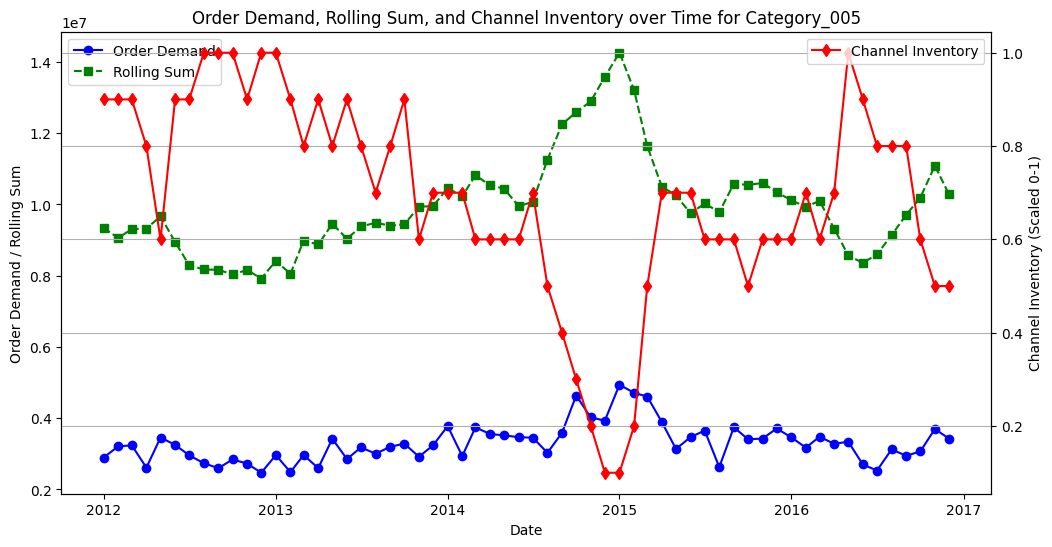

In [168]:
# Filter the dataframe for Category_005
df_filtered = df_grouped[df_grouped['Product_Category'] == "Category_005"]

# Create the figure and axis
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Order_Demand and Rolling_Sum on primary y-axis
ax1.plot(df_filtered['Date'], df_filtered['Order_Demand'], label="Order Demand", marker='o', linestyle='-', color='blue')
ax1.plot(df_filtered['Date'], df_filtered['Rolling_Sum'], label="Rolling Sum", marker='s', linestyle='--', color='green')

# Labels and title
ax1.set_xlabel("Date")
ax1.set_ylabel("Order Demand / Rolling Sum")
ax1.set_title("Order Demand, Rolling Sum, and Channel Inventory over Time for Category_005")
ax1.legend(loc="upper left")

# Create secondary y-axis for Channel_Inventory
ax2 = ax1.twinx()
ax2.plot(df_filtered['Date'], df_filtered['Channel_Inventory'], label="Channel Inventory", marker='d', linestyle='-', color='red')
ax2.set_ylabel("Channel Inventory (Scaled 0-1)")
ax2.legend(loc="upper right")

# Format x-axis labels
plt.xticks(rotation=45)
plt.grid()

# Show plot
plt.show()

This concludes that the synthetic data generation was correct for the channel inventory attribute as it generally shows a negative correlation with future order levels (as one would normally expect).

## Populate the Order Backlog column (as part of the Data Preparation)

When creating synthetic dta to populate the Order Backlog column, we've assumed it's positively correlated with the future demand in general, thus (for each product group, for each month) we've calculated it by taking the next 3-month order demand levels and adding some random noise to it (making sure the data land in the 90%-110% range of the value calculated by taking the next 3-month order demand levels) to reflect that this correlation would not be perferct at +1. And we've also rounded these order baclog values to the closest integer value (to avoid the problem of fractional units/quantities).

In [169]:
# Ensure df is sorted correctly
df = df.sort_values(['Product_Code', 'Date'])

# Create a complete timeline for each Product_Code to ensure all months are included
all_dates = pd.date_range(start=df['Date'].min(), end=df['Date'].max(), freq='MS')  # Month Start Frequency

# Generate a full DataFrame including all months per Product_Code
product_codes = df['Product_Code'].unique()
template = pd.MultiIndex.from_product([product_codes, all_dates], names=['Product_Code', 'Date']).to_frame(index=False)

# Merge to fill in missing months with Order_Demand = 0
df_filled = template.merge(df, on=['Product_Code', 'Date'], how='left').fillna({'Order_Demand': 0})

# Compute 3-month forward-looking rolling sum within each Product_Code
df_filled['Next_3M_Sales'] = (
    df_filled.groupby('Product_Code')['Order_Demand']
    .apply(lambda x: x.rolling(window=3, min_periods=1).sum().shift(-2))  # Forward-looking rolling sum
    .reset_index(drop=True)
)

# Fill NaN values with 0 for missing months
df_filled['Next_3M_Sales'].fillna(0, inplace=True)

# Calculate the next 3-month order demand
df_filled['Order_Backlog'] = df_filled['Next_3M_Sales']

# If Order_Backlog is zero, overwrite it with 3 times the current month's Order_Demand
df_filled.loc[df_filled['Order_Backlog'] == 0, 'Order_Backlog'] = df_filled['Order_Demand'] * 3

# Apply random noise: -10% to +10%
np.random.seed(42)  # Ensures reproducibility
random_factors = np.random.uniform(0.9, 1.1, size=len(df_filled))  # Range [0.9, 1.1]
df_filled['Order_Backlog'] = df_filled['Order_Backlog'] * random_factors

# Round Order_Backlog to integer values while keeping float64 format
df_filled['Order_Backlog'] = df_filled['Order_Backlog'].round(0)  # Round to nearest integer

# Drop temporary column
df_filled.drop(columns=['Next_3M_Sales'], inplace=True)

# Merge back with original df to restore other columns
df = df_filled.merge(df.drop(columns=['Order_Demand'], errors='ignore'), on=['Product_Code', 'Date'], how='left')

# Display updated DataFrame
display(df)

C:\Users\mzsot\AppData\Local\Temp\ipykernel_3692\753317189.py:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_filled['Next_3M_Sales'].fillna(0, inplace=True)


,Product_Code,Date,Product_Category_x,Year_x,Month_x,Order_Demand,Order_Backlog_x,Month_Num_x,High_Season_x,Channel_Inventory_x,Product_Category_y,Year_y,Month_y,Order_Backlog_y,Month_Num_y,High_Season_y,Channel_Inventory_y
0,Product_0001,2012-01-01,Category_005,2012.0,January,9700.0,35877.0,1.0,0.0,0.9,Category_005,2012.0,January,NaN,1.0,0.0,0.9
1,Product_0001,2012-02-01,Category_005,2012.0,February,13000.0,33140.0,2.0,0.0,0.9,Category_005,2012.0,February,NaN,2.0,0.0,0.9
2,Product_0001,2012-03-01,Category_005,2012.0,March,14100.0,27834.0,3.0,1.0,0.9,Category_005,2012.0,March,NaN,3.0,1.0,0.9
3,Product_0001,2012-04-01,Category_005,2012.0,April,3300.0,19273.0,4.0,0.0,0.8,Category_005,2012.0,April,NaN,4.0,0.0,0.8
4,Product_0001,2012-05-01,Category_005,2012.0,May,9200.0,23932.0,5.0,0.0,0.6,Category_005,2012.0,May,NaN,5.0,0.0,0.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129595,Product_2172,2016-08-01,Category_005,2016.0,August,900.0,3272.0,8.0,0.0,0.8,Category_005,2016.0,August,NaN,8.0,0.0,0.8
129596,Product_2172,2016-09-01,Category_005,2016.0,September,1200.0,2858.0,9.0,0.0,0.8,Category_005,2016.0,September,NaN,9.0,0.0,0.8
129597,Product_2172,2016-10-01,Category_005,2016.0,October,900.0,1885.0,10.0,1.0,0.6,Category_005,2016.0,October,NaN,10.0,1.0,0.6
129598,Product_2172,2016-11-01,Category_005,2016.0,November,900.0,2582.0,11.0,0.0,0.5,Category_005,2016.0,November,NaN,11.0,0.0,0.5


In [170]:
# Drop unnecessary columns
df.drop(columns=['Product_Category_y', 'Year_y', 'Month_y', 'Order_Backlog_y', 'High_Season_y', 'Month_Num_y', 'Channel_Inventory_y' ], inplace=True)

# Display updated DataFrame
display(df)

,Product_Code,Date,Product_Category_x,Year_x,Month_x,Order_Demand,Order_Backlog_x,Month_Num_x,High_Season_x,Channel_Inventory_x
0,Product_0001,2012-01-01,Category_005,2012.0,January,9700.0,35877.0,1.0,0.0,0.9
1,Product_0001,2012-02-01,Category_005,2012.0,February,13000.0,33140.0,2.0,0.0,0.9
2,Product_0001,2012-03-01,Category_005,2012.0,March,14100.0,27834.0,3.0,1.0,0.9
3,Product_0001,2012-04-01,Category_005,2012.0,April,3300.0,19273.0,4.0,0.0,0.8
4,Product_0001,2012-05-01,Category_005,2012.0,May,9200.0,23932.0,5.0,0.0,0.6
...,...,...,...,...,...,...,...,...,...,...
129595,Product_2172,2016-08-01,Category_005,2016.0,August,900.0,3272.0,8.0,0.0,0.8
129596,Product_2172,2016-09-01,Category_005,2016.0,September,1200.0,2858.0,9.0,0.0,0.8
129597,Product_2172,2016-10-01,Category_005,2016.0,October,900.0,1885.0,10.0,1.0,0.6
129598,Product_2172,2016-11-01,Category_005,2016.0,November,900.0,2582.0,11.0,0.0,0.5


In [171]:
# Rename columns ending with "_x"
df.rename(columns={'Product_Category_x': 'Product_Category', 'Year_x': 'Year', 'Month_x': 'Month', 'Order_Backlog_x': 'Order_Backlog', 'High_Season_x': 'High_Season', 'Month_Num_x': 'Month_Num', 'Channel_Inventory_x': 'Channel_Inventory'}, inplace=True)

# Display updated DataFrame
display(df)

,Product_Code,Date,Product_Category,Year,Month,Order_Demand,Order_Backlog,Month_Num,High_Season,Channel_Inventory
0,Product_0001,2012-01-01,Category_005,2012.0,January,9700.0,35877.0,1.0,0.0,0.9
1,Product_0001,2012-02-01,Category_005,2012.0,February,13000.0,33140.0,2.0,0.0,0.9
2,Product_0001,2012-03-01,Category_005,2012.0,March,14100.0,27834.0,3.0,1.0,0.9
3,Product_0001,2012-04-01,Category_005,2012.0,April,3300.0,19273.0,4.0,0.0,0.8
4,Product_0001,2012-05-01,Category_005,2012.0,May,9200.0,23932.0,5.0,0.0,0.6
...,...,...,...,...,...,...,...,...,...,...
129595,Product_2172,2016-08-01,Category_005,2016.0,August,900.0,3272.0,8.0,0.0,0.8
129596,Product_2172,2016-09-01,Category_005,2016.0,September,1200.0,2858.0,9.0,0.0,0.8
129597,Product_2172,2016-10-01,Category_005,2016.0,October,900.0,1885.0,10.0,1.0,0.6
129598,Product_2172,2016-11-01,Category_005,2016.0,November,900.0,2582.0,11.0,0.0,0.5


In [172]:
df.tail(60)

,Product_Code,Date,Product_Category,Year,Month,Order_Demand,Order_Backlog,Month_Num,High_Season,Channel_Inventory
129540,Product_2172,2012-01-01,Category_005,2012.0,January,100.0,218.0,1.0,0.0,0.9
129541,Product_2172,2012-02-01,NaN,NaN,NaN,0.0,569.0,NaN,NaN,NaN
129542,Product_2172,2012-03-01,Category_005,2012.0,March,100.0,564.0,3.0,1.0,0.9
129543,Product_2172,2012-04-01,Category_005,2012.0,April,500.0,686.0,4.0,0.0,0.8
129544,Product_2172,2012-05-01,NaN,NaN,NaN,0.0,205.0,NaN,NaN,NaN
129545,Product_2172,2012-06-01,Category_005,2012.0,June,200.0,203.0,6.0,0.0,0.9
129546,Product_2172,2012-07-01,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN
129547,Product_2172,2012-08-01,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN
129548,Product_2172,2012-09-01,NaN,NaN,NaN,0.0,102.0,NaN,NaN,NaN
129549,Product_2172,2012-10-01,NaN,NaN,NaN,0.0,319.0,NaN,NaN,NaN


In [173]:
df = df.dropna()

In [174]:
df.tail(60)

,Product_Code,Date,Product_Category,Year,Month,Order_Demand,Order_Backlog,Month_Num,High_Season,Channel_Inventory
129510,Product_2171,2014-07-01,Category_007,2014.0,July,39.0,96.0,7.0,1.0,0.8
129511,Product_2171,2014-08-01,Category_007,2014.0,August,26.0,113.0,8.0,0.0,0.4
129512,Product_2171,2014-09-01,Category_007,2014.0,September,23.0,115.0,9.0,0.0,0.6
129513,Product_2171,2014-10-01,Category_007,2014.0,October,72.0,94.0,10.0,1.0,0.6
129514,Product_2171,2014-11-01,Category_007,2014.0,November,17.0,77.0,11.0,0.0,0.7
129515,Product_2171,2014-12-01,Category_007,2014.0,December,14.0,100.0,12.0,0.0,0.8
129516,Product_2171,2015-01-01,Category_007,2015.0,January,46.0,247.0,1.0,0.0,0.3
129517,Product_2171,2015-02-01,Category_007,2015.0,February,42.0,216.0,2.0,0.0,0.0
129518,Product_2171,2015-03-01,Category_007,2015.0,March,149.0,184.0,3.0,1.0,0.1
129519,Product_2171,2015-04-01,Category_007,2015.0,April,25.0,87.0,4.0,0.0,0.7


Finally, we're going to plot the order demand and order backlog values for one product in order to see if the order backlog vaues show a general positive correlation with the order demand levels over the next 3 months.

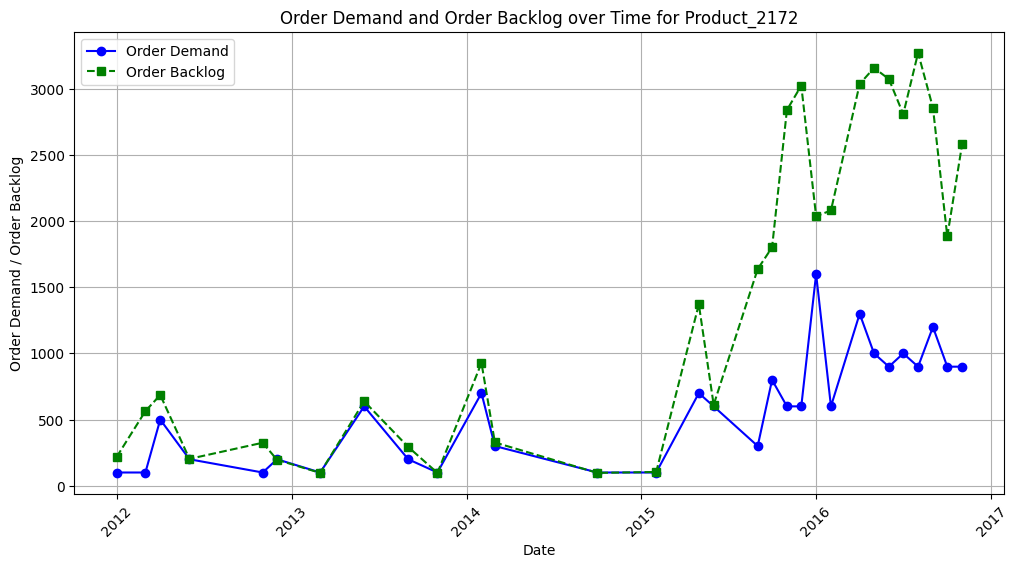

In [175]:
# Filter the dataframe for Product_2172
df_filtered_2 = df[df['Product_Code'] == "Product_2172"]

# Create the figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot Order_Demand and Order_Backlog
ax.plot(df_filtered_2['Date'], df_filtered_2['Order_Demand'], label="Order Demand", marker='o', linestyle='-', color='blue')
ax.plot(df_filtered_2['Date'], df_filtered_2['Order_Backlog'], label="Order Backlog", marker='s', linestyle='--', color='green')

# Labels and title
ax.set_xlabel("Date")
ax.set_ylabel("Order Demand / Order Backlog")
ax.set_title("Order Demand and Order Backlog over Time for Product_2172")
ax.legend(loc="upper left")

# Format x-axis labels
plt.xticks(rotation=45)
plt.grid()

# Show plot
plt.show()

This concludes that the synthetic data generation was correct for the order backlog attribute as it generally shows a positive correlation with future order levels (as one would normally expect). E.g. order backlog level in December 2015 was relatively high (close to 3,000 units) because the order demand levels over the next 3 months were also relatively high in aggregate).

In [176]:
df.head()

,Product_Code,Date,Product_Category,Year,Month,Order_Demand,Order_Backlog,Month_Num,High_Season,Channel_Inventory
0,Product_0001,2012-01-01,Category_005,2012.0,January,9700.0,35877.0,1.0,0.0,0.9
1,Product_0001,2012-02-01,Category_005,2012.0,February,13000.0,33140.0,2.0,0.0,0.9
2,Product_0001,2012-03-01,Category_005,2012.0,March,14100.0,27834.0,3.0,1.0,0.9
3,Product_0001,2012-04-01,Category_005,2012.0,April,3300.0,19273.0,4.0,0.0,0.8
4,Product_0001,2012-05-01,Category_005,2012.0,May,9200.0,23932.0,5.0,0.0,0.6


In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 105177 entries, 0 to 129598
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Product_Code       105177 non-null  object        
 1   Date               105177 non-null  datetime64[ns]
 2   Product_Category   105177 non-null  object        
 3   Year               105177 non-null  float64       
 4   Month              105177 non-null  object        
 5   Order_Demand       105177 non-null  float64       
 6   Order_Backlog      105177 non-null  float64       
 7   Month_Num          105177 non-null  float64       
 8   High_Season        105177 non-null  float64       
 9   Channel_Inventory  105177 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(3)
memory usage: 8.8+ MB


## Model Setup & Implementation

## Feature Selection

The aim of the model is to predict order demand at the product code level as accurately as possible using the following input features:
- average of the (i) order demand of the same month last year (we can call it reference period month), and the order demands from the months (ii) prior to and (iii) following the reference period month
- order backlog in the latest available historical month
- channel inventory in the latest available historical month
- high season (i.e. whether the forecasted future month belongs to high season or not)

Based on these input features, we're going to buid and evaluate tree-based models, such as Random Forest and XGBoost and deep learning model LSTM Neural Networks.

## Feature Engineering

Create prior year average demand feature (average of order demand of same month last year and the months before and after that month).

In [178]:
# Sort by Product Code & Date
df = df.sort_values(['Product_Code', 'Date'])

# Create a Reference Year for the Same Month Last Year
df["Ref_Year"] = df["Year"] - 1  # Reference Year (same period last year)

# Create helper columns for the previous & next months relative to the reference period
df["Prev_Month"] = df["Month_Num"] - 1
df["Next_Month"] = df["Month_Num"] + 1

# Handle edge cases: January & December adjustments
df.loc[df["Month_Num"] == 1, "Prev_Month"] = 12
df.loc[df["Month_Num"] == 1, "Ref_Year_Prev"] = df.loc[df["Month_Num"] == 1, "Ref_Year"] - 1

df.loc[df["Month_Num"] == 12, "Next_Month"] = 1
df.loc[df["Month_Num"] == 12, "Ref_Year_Next"] = df.loc[df["Month_Num"] == 12, "Ref_Year"] + 1

# Ensure NaN values in Ref_Year_Prev and Ref_Year_Next are filled properly
df.loc[:, "Ref_Year_Prev"] = df["Ref_Year_Prev"].fillna(df["Ref_Year"])
df.loc[:, "Ref_Year_Next"] = df["Ref_Year_Next"].fillna(df["Ref_Year"])


# Merge Order Demand from the reference period & adjacent months
df = df.merge(
    df[["Product_Code", "Year", "Month_Num", "Order_Demand"]],
    left_on=["Product_Code", "Ref_Year", "Month_Num"],
    right_on=["Product_Code", "Year", "Month_Num"],
    how="left",
    suffixes=("", "_Ref")
)

df = df.merge(
    df[["Product_Code", "Year", "Month_Num", "Order_Demand"]],
    left_on=["Product_Code", "Ref_Year", "Prev_Month"],
    right_on=["Product_Code", "Year", "Month_Num"],
    how="left",
    suffixes=("", "_Prev")
)

df = df.merge(
    df[["Product_Code", "Year", "Month_Num", "Order_Demand"]],
    left_on=["Product_Code", "Ref_Year", "Next_Month"],
    right_on=["Product_Code", "Year", "Month_Num"],
    how="left",
    suffixes=("", "_Next")
)

# Compute the seasonal average demand (average of same month last year and its adjacent months)
df["Seasonal_Avg_Demand"] = df[["Order_Demand_Ref", "Order_Demand_Prev", "Order_Demand_Next"]].mean(axis=1)

# Fill missing values with 0 (for cases where no reference data is available)
df.loc[:, "Seasonal_Avg_Demand"] = df["Seasonal_Avg_Demand"].fillna(0)

# Drop unnecessary columns
df.drop(columns=["Ref_Year", "Prev_Month", "Next_Month", "Ref_Year_Prev", "Ref_Year_Next",
                 "Order_Demand_Ref", "Order_Demand_Prev", "Order_Demand_Next"], inplace=True, errors="ignore")

print("Feature Engineering Completed Successfully")

Feature Engineering Completed Successfully


Define that the model should use the latest available (historical) order backlog data for the predictions

In [179]:
# Set the training cutoff year manually (for controlled testing)
last_train_year = 2015  

# Get the last available backlog for each product code in the training dataset
backlog_end_train = df[df['Year'] == last_train_year].groupby('Product_Code')['Order_Backlog'].last().reset_index()

# Merge the static backlog into the dataset
df = df.merge(backlog_end_train, on='Product_Code', how='left', suffixes=('', '_LastTrain'))

# Note!
Once the model is trained, tested and validated and is ready to roll out in real life use, the above code will need to be changed to:

last_train_year = df['Year'].max()  # Always picks the latest available year

backlog_end_train = df[df['Year'] == last_train_year].groupby('Product_Code')['Order_Backlog'].last().reset_index() # Get the last available backlog for each product code in the training dataset

df = df.merge(backlog_end_train, on='Product_Code', how='left', suffixes=('', '_LastTrain')) # Merge the static backlog into the dataset

This is necesary in order to make sure the model always automatically captures the data from teh latest historic month.

While training the model, we had a training dataset (till 2015) and a testing dataset (2016), and this code would have captured data from 2016 while we wanted it to capture data from 2015. This is why in the above code for training we had to specify the year (2015).

Define that the model should use the latest available (historical) channel inventory data for the predictions

In [180]:
# Set the training cutoff year manually (for controlled testing)
last_train_year = 2015  

# Get the last available channel inventory for each product code in the training dataset
channel_inventory_end_train = df[df['Year'] == last_train_year].groupby('Product_Code')['Channel_Inventory'].last().reset_index()

# Merge the static channel inventory into the dataset
df = df.merge(channel_inventory_end_train, on='Product_Code', how='left', suffixes=('', '_LastTrain'))

# Note!
Once the model is trained, tested and validated and is ready to roll out in real life use, the above code will need to be changed to:

last_train_year = df['Year'].max()  # Always picks the latest available year

channel_inventory_end_train = df[df['Year'] == last_train_year].groupby('Product_Code')['Channel_Inventory'].last().reset_index() # Get the last available backlog for each product code in the training dataset

df = df.merge(channel_inventory_end_train, on='Product_Code', how='left', suffixes=('', '_LastTrain')) # Merge the static backlog into the dataset

This is necesary in order to make sure the model always automatically captures the data from teh latest historic month.

While training the model, we had a training dataset (till 2015) and a testing dataset (2016), and this code would have captured data from 2016 while we wanted it to capture data from 2015. This is why in the above code for training we had to specify the year (2015).

Select Final Features

In [181]:
features = ["Seasonal_Avg_Demand", "Order_Backlog_LastTrain", "Channel_Inventory_LastTrain", "High_Season"]
target = 'Order_Demand'

We've also been thinking about using mean order demand for the rolling last 3 months for each product code. However, this would have used more predicted data (in the rolling last 3 month data) as we forecasted further out (e.g. if the latest historical period is December 2025, the February 2016 order demand prediction would have already used 1 forecasted period data - January 2016). For this reason, we preferred sticking to the "Seasonal_Avg_Demand" input variable as it used the average of the order demand from the same month of the previous years and its adjacent months, thus better reflecting potential seasonality, ensuring the model always uses historical/actual data, but at the same time it smooths the impact of potential monthly fluctiations. Lagged features for similar reasons were not an option either.

## Train-Test Split

In [182]:
train = df[df['Year'] < 2016]  # Use 2012-2015 as training data
test = df[(df['Year'] == 2016) & (df['Month'].isin(['January', 'February', 'March', 'April', 'May', 'June']))] # Use the first 6 months of 2016 for testing

X_train, y_train = train[features], train[target]
X_test, y_test = test[features], test[target]

In [183]:
# Standardize features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [184]:
print(df.isna().sum())  # Check which columns have NaNs

Product_Code                       0
Date                               0
Product_Category                   0
Year                               0
Month                              0
Order_Demand                       0
Order_Backlog                      0
Month_Num                          0
High_Season                        0
Channel_Inventory                  0
Year_Ref                       29521
Year_Prev                      29588
Month_Num_Prev                 29588
Year_Next                      29557
Month_Num_Next                 29557
Seasonal_Avg_Demand                0
Order_Backlog_LastTrain          235
Channel_Inventory_LastTrain      235
dtype: int64


In [185]:
# Drop unnecessary columns before modeling
df.drop(columns=['Year_Ref', 'Year_Prev', 'Month_Num_Prev', 'Year_Next', 'Month_Num_Next'], inplace=True)

# Fill NaNs in Order_Backlog_LastTrain and Channel_Inventory_LastTrain with 0
df[['Order_Backlog_LastTrain', 'Channel_Inventory_LastTrain']] = df[['Order_Backlog_LastTrain', 'Channel_Inventory_LastTrain']].fillna(0)

# Check again if any NaNs remain
print(df.isna().sum().sum())  # Should print 0

0


## Random Forest Regressor

In [187]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize model
rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)

# Train model
rf_model.fit(X_train, y_train)

# Predict
y_pred_rf = rf_model.predict(X_test)

# Evaluate performance
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f"Random Forest MAE: {mae_rf}")
print(f"Random Forest R²: {r2_rf}")

Random Forest MAE: 16525.054056541514
Random Forest R²: 0.8729504835433417


In [188]:
mape_rf = np.mean(np.abs((y_test - y_pred_rf) / y_test)) * 100
print(f"Random Forest MAPE: {mape_rf:.2f}%")

Random Forest MAPE: 561.65%


Interestinlgy, the model's MAPE was very high at 562%, but the R-squared value at 0.87 was relatively good (not to far from the best possible value of 1). However, the R-squared value can be misleading when the dataset contains outliers or the target values vary widely. We believe the dataset is affectd by both of these phenomenons. MAPE can also get unrealistically high in case y_test includes values very close to zero, and dividing by those very small numbers can explode the percentage error even for small absolute differences. The current dataset also contains very small actual target values. This is why we also calculated SMAPE (Symmetric MAPE, which handles small values better).

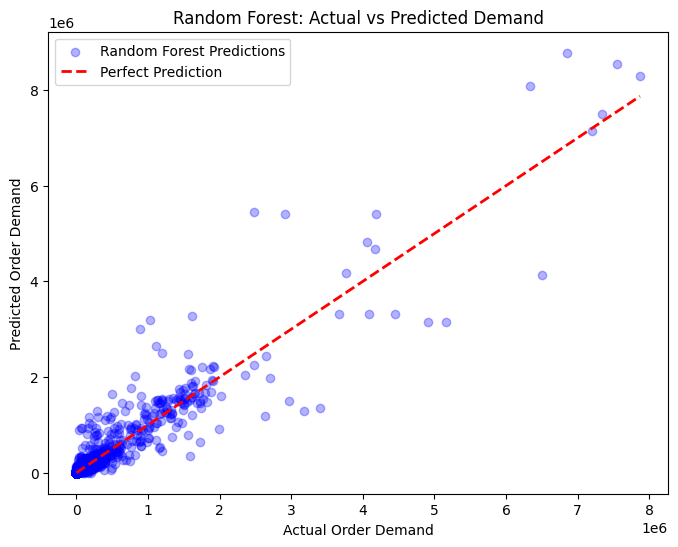

In [189]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_rf, alpha=0.3, color='blue', label='Random Forest Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction')
plt.xlabel("Actual Order Demand")
plt.ylabel("Predicted Order Demand")
plt.title("Random Forest: Actual vs Predicted Demand")
plt.legend()
plt.show()

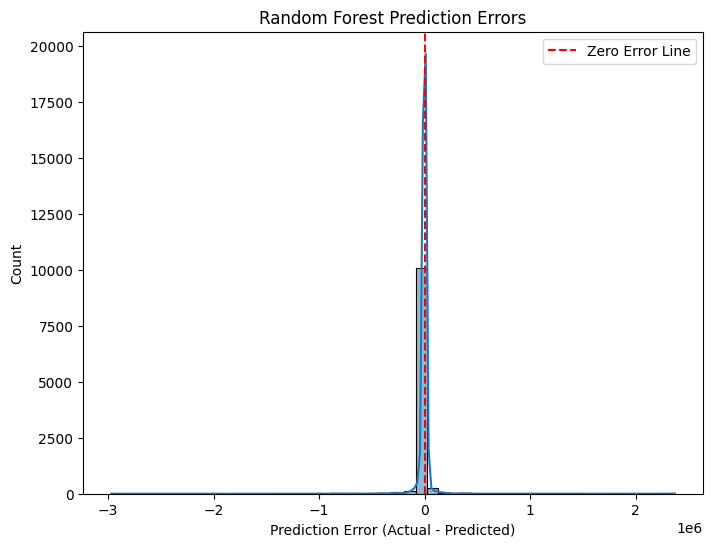

In [190]:
import seaborn as sns

errors = y_test - y_pred_rf
plt.figure(figsize=(8,6))
sns.histplot(errors, bins=50, kde=True)
plt.axvline(0, color='red', linestyle='dashed', label="Zero Error Line")
plt.xlabel("Prediction Error (Actual - Predicted)")
plt.title("Random Forest Prediction Errors")
plt.legend()
plt.show()

Get feature importance from the trained Random Forest model

In [195]:
features = X_train.columns

In [196]:
features = rf_model.feature_names_in_

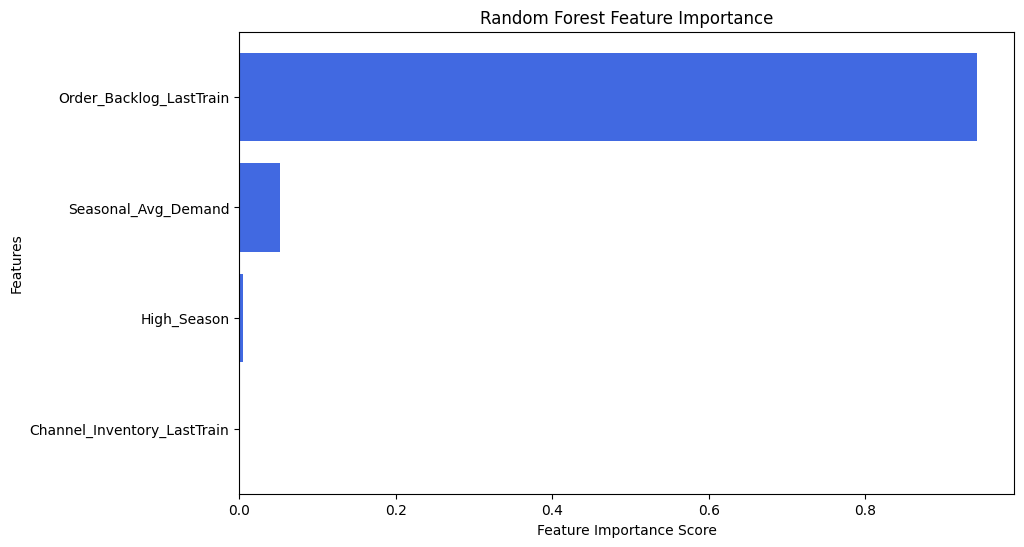

In [197]:
rf_feature_importance = rf_model.feature_importances_

# Create a DataFrame for visualization
rf_importance_df = pd.DataFrame({'Feature': features, 'Importance': rf_feature_importance})
rf_importance_df = rf_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(rf_importance_df['Feature'], rf_importance_df['Importance'], color='royalblue')
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Random Forest Feature Importance")
plt.gca().invert_yaxis()  # Invert so the most important feature is on top
plt.show()


In [198]:
smape = np.mean(2 * np.abs(y_test - y_pred_rf) / (np.abs(y_test) + np.abs(y_pred_rf))) * 100
print(f"SMAPE: {smape:.2f}%")

SMAPE: 81.80%


In [199]:
# Apply log transformation to the target variable (adding 1 to avoid log(0))
y_train_log = np.log1p(y_train)  # log1p(x) = log(x + 1) to avoid log(0)
y_test_log = np.log1p(y_test)

# Train the Random Forest model on log-transformed target
rf_model_log = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_log.fit(X_train, y_train_log)

# Predict on test set (in log scale)
y_pred_log = rf_model_log.predict(X_test)

# Convert predictions back to the original scale (exponential transformation)
y_pred_rf_log = np.expm1(y_pred_log)  # expm1(x) = exp(x) - 1

# Evaluate performance with MAE
mae_rf_log = mean_absolute_error(y_test, y_pred_rf_log)
print(f"Random Forest MAE after log transformation: {mae_rf_log:.2f}")

# Compute MAPE after log transformation
mape_rf_log = np.mean(np.abs((y_test - y_pred_rf_log) / y_test)) * 100
print(f"Random Forest MAPE after log transformation: {mape_rf_log:.2f}%")


Random Forest MAE after log transformation: 16672.23
Random Forest MAPE after log transformation: 199.08%


Applying log transformation to the target variable did not improve the MAE.

Using GridSearchCV can help improve the Random Forest Regressor’s accuracy by automatically searching for the best combination of hyperparameters.
GridSearchCV is a function from scikit-learn that:

- Systematically tests different combinations of model parameters,
- Uses cross-validation to evaluate each combination’s performance,
- Returns the best-performing model.

It tunes hyperparameters, e.g. number of estimators/trees), depth of trees, etc.

In [200]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Initialize base model
rf_gridserachcv = RandomForestRegressor(random_state=42)

# Grid search with 3-fold cross-validation
grid_search = GridSearchCV(estimator=rf_gridserachcv, param_grid=param_grid,
                           cv=3, scoring='neg_mean_absolute_error',
                           n_jobs=-1, verbose=1)

# Fit grid search to training data
grid_search.fit(X_train, y_train)

# Get best model from search
best_rf = grid_search.best_estimator_

# Predict on test set
y_pred_rf_gridserachcv = best_rf.predict(X_test)

# Evaluate
mae_rf_gridserachcv = mean_absolute_error(y_test, y_pred_rf_gridserachcv)
print(f"Best Random Forest MAE: {mae_rf_gridserachcv:.2f}")
print(f"Best Parameters: {grid_search.best_params_}")

Fitting 3 folds for each of 48 candidates, totalling 144 fits
Best Random Forest MAE: 16261.61
Best Parameters: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}


Applying GridSearchCV did not have any major impact on the model's prediction accuracy.

Finally, we've also run the Random Forest regressor using the standardized features and fine tuned hyperparameters.

In [201]:
# Initialize model
rf_model2 = RandomForestRegressor(n_estimators=150, max_depth=8, random_state=42, min_samples_split=5)

# Train model
rf_model2.fit(X_train_scaled, y_train)

# Predict
y_pred_rf_2 = rf_model2.predict(X_test_scaled)

# Evaluate performance
mae_rf2 = mean_absolute_error(y_test, y_pred_rf_2)
r2_rf2 = r2_score(y_test, y_pred_rf_2)
print(f"Random Forest MAE: {mae_rf2}")
print(f"Random Forest R²: {r2_rf2}")

Random Forest MAE: 16286.181456646693
Random Forest R²: 0.8809256660282139


Both the MAE and the R-squared values remained very close to the original Random Forest model.

And finally - out of curiosity, given the extremely volatile historic demand pattern in the dataset - we've tested, the MAE and R-squared values of the Random Forest model by excluding the historical order demand from the input features.

In [202]:
features_wo_hist_demand = ["Order_Backlog_LastTrain", "Channel_Inventory_LastTrain", "High_Season"]

In [203]:
X_train_wo_hist_demand = train[features_wo_hist_demand]
X_test_wo_hist_demand = test[features_wo_hist_demand]

In [204]:
# The model was already initialized, we just left it here, commented out, just for reference
#rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)

# Train model
rf_model.fit(X_train_wo_hist_demand, y_train)

# Predict
y_pred_rf_wo_hist_demand = rf_model.predict(X_test_wo_hist_demand)

# Evaluate performance
mae_rf_wo_hist_demand = mean_absolute_error(y_test, y_pred_rf_wo_hist_demand)
r2_rf_wo_hist_demand = r2_score(y_test, y_pred_rf_wo_hist_demand)
print(f"Random Forest MAE: {mae_rf_wo_hist_demand}")
print(f"Random Forest R²: {r2_rf_wo_hist_demand}")

Random Forest MAE: 15558.297997141217
Random Forest R²: 0.8919562550034565


Interestingly, by not including historical order demand as a prediction variable, both the MAE and the R-squared values improved, but only by a little.

## XGBoost Regressor

In [205]:
!pip install xgboost

In [215]:
from xgboost import XGBRegressor

# Initialize model
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=10, random_state=42)

# Train model
xgb_model.fit(X_train, y_train)

# Predict
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
print(f"XGBoost MAE: {mae_xgb}")
print(f"XGBoost R²: {r2_xgb}")

XGBoost MAE: 18247.08764124922
XGBoost R²: 0.843286180410502


Get feature importance from the trained XGBoost model

In [210]:
features_used = xgb_model.get_booster().feature_names

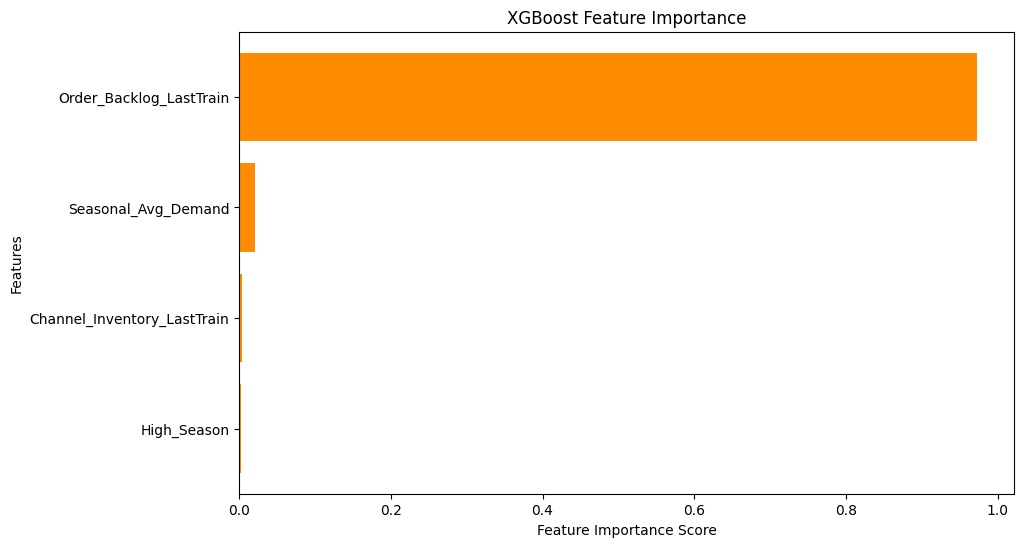

In [211]:
importances = xgb_model.feature_importances_

# Create DataFrame
xgb_importance_df = pd.DataFrame({'Feature': features_used, 'Importance': importances})
xgb_importance_df = xgb_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(xgb_importance_df['Feature'], xgb_importance_df['Importance'], color='darkorange')
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("XGBoost Feature Importance")
plt.gca().invert_yaxis()
plt.show()

And we've also tested the MAE and R-squared values of the XGBoost Regressor model by excluding the historical order demand from the input features, introducing early stopping and fine-tuning some of the hyperparameters.

In [214]:
# Initialize model
xgb_model2 = XGBRegressor(n_estimators=100, learning_rate=0.08, max_depth=4, random_state=42, early_stopping_rounds=10)

# Train model
xgb_model2.fit(X_train_wo_hist_demand, y_train, eval_set=[(X_test_wo_hist_demand, y_test)], verbose=False)

# Predict
y_pred_xgb_wo_hist_demand = xgb_model2.predict(X_test_wo_hist_demand)

# Evaluate
mae_xgb_wo_hist_demand = mean_absolute_error(y_test, y_pred_xgb_wo_hist_demand)
r2_xgb_wo_hist_demand = r2_score(y_test, y_pred_xgb_wo_hist_demand)
print(f"XGBoost MAE: {mae_xgb_wo_hist_demand}")
print(f"XGBoost R²: {r2_xgb_wo_hist_demand}")

XGBoost MAE: 18141.55749959001
XGBoost R²: 0.8685175345575578


Neither the MAE and the R-squared values improved significantly.

## LSTM Neural Network

In [216]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Reshape input data for LSTM
X_train_lstm = np.array(X_train).reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_lstm = np.array(X_test).reshape((X_test.shape[0], X_test.shape[1], 1))

# Build LSTM model
model = Sequential([
    LSTM(50, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], 1)),
    LSTM(50, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mae')

# Train model
model.fit(X_train_lstm, y_train, epochs=10, batch_size=16)

# Predict
y_pred_lstm = model.predict(X_test_lstm)
mae_lstm = mean_absolute_error(y_test, y_pred_lstm)
print(f"LSTM MAE: {mae_lstm}")

C:\Users\mzsot\.julia\conda\3\x86_64\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
5217/5217 ━━━━━━━━━━━━━━━━━━━━ 34s 5ms/step - loss: nan 
Epoch 2/10
5217/5217 ━━━━━━━━━━━━━━━━━━━━ 29s 6ms/step - loss: nan
Epoch 3/10
5217/5217 ━━━━━━━━━━━━━━━━━━━━ 30s 6ms/step - loss: nan
Epoch 4/10
5217/5217 ━━━━━━━━━━━━━━━━━━━━ 41s 6ms/step - loss: nan
Epoch 5/10
5217/5217 ━━━━━━━━━━━━━━━━━━━━ 29s 5ms/step - loss: nan
Epoch 6/10
5217/5217 ━━━━━━━━━━━━━━━━━━━━ 29s 5ms/step - loss: nan
Epoch 7/10
5217/5217 ━━━━━━━━━━━━━━━━━━━━ 42s 6ms/step - loss: nan
Epoch 8/10
5217/5217 ━━━━━━━━━━━━━━━━━━━━ 30s 6ms/step - loss: nan
Epoch 9/10
5217/5217 ━━━━━━━━━━━━━━━━━━━━ 29s 5ms/step - loss: nan
Epoch 10/10
5217/5217 ━━━━━━━━━━━━━━━━━━━━ 30s 6ms/step - loss: nan
334/334 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step    


ValueError: Input contains NaN.

As the above code ran into an error due to NaN values in the dataset, we were first going to check the number of NaN instances in the dataset (before deciding about how to proceed to handle them).

In [217]:
print(X_train.isna().sum().sum())  # Should print 0
print(X_test.isna().sum().sum())   # Should print 0
print(y_train.isna().sum().sum())  # Should print 0
print(y_test.isna().sum().sum())   # Should print 0

86
114
0
0


In [218]:
print(f"Shape of X_train: {X_train.shape}")  # (rows, columns)
print(f"Shape of X_test: {X_test.shape}")    # (rows, columns)

Shape of X_train: (83470, 4)
Shape of X_test: (10671, 4)


As the number of rows with NaN values is limited, we're going fill them with mean values.

In [219]:
X_train = X_train.apply(lambda x: x.fillna(x.mean()), axis=0)
X_test = X_test.apply(lambda x: x.fillna(x.mean()), axis=0)

In [220]:
print(X_train.isna().sum().sum())  # Should print 0
print(X_test.isna().sum().sum())   # Should print 0
print(y_train.isna().sum().sum())  # Should print 0
print(y_test.isna().sum().sum())   # Should print 0

0
0
0
0


Now we're going to rerun the LSTM model

In [228]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Reshape input data for LSTM
X_train_lstm = np.array(X_train).reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_lstm = np.array(X_test).reshape((X_test.shape[0], X_test.shape[1], 1))

# Build LSTM model
model = Sequential([
    LSTM(50, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], 1)),
    LSTM(50, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mae')

# Train model
model.fit(X_train_lstm, y_train, epochs=10, batch_size=16)

# Predict
y_pred_lstm = model.predict(X_test_lstm)
mae_lstm = mean_absolute_error(y_test, y_pred_lstm)
r2_lstm = r2_score(y_test, y_pred_lstm)
print(f"LSTM MAE: {mae_lstm}")
print(f"LSTM R²: {r2_lstm}")

Epoch 1/10


C:\Users\mzsot\.julia\conda\3\x86_64\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5217/5217 ━━━━━━━━━━━━━━━━━━━━ 36s 6ms/step - loss: 18668.7520
Epoch 2/10
5217/5217 ━━━━━━━━━━━━━━━━━━━━ 41s 6ms/step - loss: 18333.9395
Epoch 3/10
5217/5217 ━━━━━━━━━━━━━━━━━━━━ 40s 6ms/step - loss: 18425.7617
Epoch 4/10
5217/5217 ━━━━━━━━━━━━━━━━━━━━ 30s 6ms/step - loss: 17963.7305
Epoch 5/10
5217/5217 ━━━━━━━━━━━━━━━━━━━━ 32s 6ms/step - loss: 18567.7383
Epoch 6/10
5217/5217 ━━━━━━━━━━━━━━━━━━━━ 30s 6ms/step - loss: 18250.2051
Epoch 7/10
5217/5217 ━━━━━━━━━━━━━━━━━━━━ 30s 6ms/step - loss: 18626.2168
Epoch 8/10
5217/5217 ━━━━━━━━━━━━━━━━━━━━ 31s 6ms/step - loss: 17024.7246
Epoch 9/10
5217/5217 ━━━━━━━━━━━━━━━━━━━━ 30s 6ms/step - loss: 17978.9414
Epoch 10/10
5217/5217 ━━━━━━━━━━━━━━━━━━━━ 30s 6ms/step - loss: 18256.0137
334/334 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step    
LSTM MAE: 14679.60523719665
LSTM R²: 0.9190103821263932


Get feature importance from the trained LSTM model

In [222]:
pip install scikeras

Note: you may need to restart the kernel to use updated packages.


In [223]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

def compute_permutation_importance_lstm(model, X_test_lstm, y_test, feature_names):
    baseline_pred = model.predict(X_test_lstm)
    baseline_mae = mean_absolute_error(y_test, baseline_pred)

    importances = []

    for i in range(X_test_lstm.shape[1]):  # Loop over features (timesteps)
        X_permuted = X_test_lstm.copy()
        np.random.shuffle(X_permuted[:, i, 0])  # Shuffle the i-th feature across all samples

        permuted_pred = model.predict(X_permuted)
        permuted_mae = mean_absolute_error(y_test, permuted_pred)
        
        importance = permuted_mae - baseline_mae
        importances.append(importance)

    return pd.DataFrame({
        'Feature': feature_names,
        'Importance': importances
    }).sort_values(by='Importance', ascending=False)

334/334 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
334/334 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
334/334 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
334/334 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
334/334 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


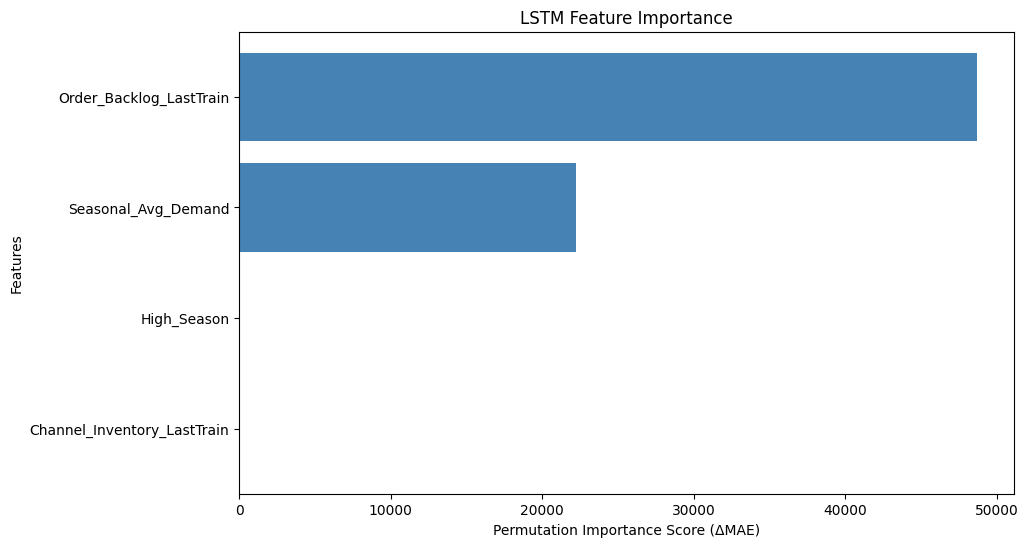

In [224]:
# List your original feature names
feature_names = X_train.columns.tolist()  # If X_train is a DataFrame

# Run permutation importance
perm_importance_df = compute_permutation_importance_lstm(model, X_test_lstm, y_test, feature_names)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(perm_importance_df['Feature'], perm_importance_df['Importance'], color='steelblue')
plt.xlabel("Permutation Importance Score (ΔMAE)")
plt.ylabel("Features")
plt.title("LSTM Feature Importance")
plt.gca().invert_yaxis()
plt.show()

In [170]:
# Build LSTM model
model2 = Sequential([
    LSTM(100, activation='tanh', return_sequences=True, input_shape=(X_train.shape[1], 1)),  
    LSTM(100, activation='tanh'),  
    Dense(1)  
])

model2.compile(optimizer='adam', loss='mae')

# Train model
model2.fit(X_train_lstm, y_train, epochs=20, batch_size=32)

# Predict
y_pred_lstm2 = model2.predict(X_test_lstm)
mae_lstm2 = mean_absolute_error(y_test, y_pred_lstm2)
print(f"LSTM MAE: {mae_lstm2}")

C:\Users\mzsot\.julia\conda\3\x86_64\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
2609/2609 ━━━━━━━━━━━━━━━━━━━━ 31s 10ms/step - loss: 49719.2852
Epoch 2/20
2609/2609 ━━━━━━━━━━━━━━━━━━━━ 25s 10ms/step - loss: 47825.8320
Epoch 3/20
2609/2609 ━━━━━━━━━━━━━━━━━━━━ 25s 10ms/step - loss: 48978.8672
Epoch 4/20
2609/2609 ━━━━━━━━━━━━━━━━━━━━ 41s 10ms/step - loss: 48600.0234
Epoch 5/20
2609/2609 ━━━━━━━━━━━━━━━━━━━━ 41s 10ms/step - loss: 46213.6953
Epoch 6/20
2609/2609 ━━━━━━━━━━━━━━━━━━━━ 25s 10ms/step - loss: 49942.3711
Epoch 7/20
2609/2609 ━━━━━━━━━━━━━━━━━━━━ 26s 10ms/step - loss: 48583.5273
Epoch 8/20
2609/2609 ━━━━━━━━━━━━━━━━━━━━ 25s 10ms/step - loss: 48476.8125
Epoch 9/20
2609/2609 ━━━━━━━━━━━━━━━━━━━━ 24s 9ms/step - loss: 47969.4102 
Epoch 10/20
2609/2609 ━━━━━━━━━━━━━━━━━━━━ 41s 9ms/step - loss: 49535.4023 
Epoch 11/20
2609/2609 ━━━━━━━━━━━━━━━━━━━━ 24s 9ms/step - loss: 48967.6914
Epoch 12/20
2609/2609 ━━━━━━━━━━━━━━━━━━━━ 25s 9ms/step - loss: 47065.5352 
Epoch 13/20
2609/2609 ━━━━━━━━━━━━━━━━━━━━ 42s 10ms/step - loss: 46497.9453
Epoch 14/20
2609/2609 

This approach didn't help (increased number of epochs from 10 to 20 and batch size from 16 to 32 and changed activation of the 2 hidden layers from ReLU to tanh), MAE actually increased. Now we return to the original LSTM hyperparameters, but we add dropout in order to reduce overfitting.

In [225]:
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Build LSTM model
model3 = Sequential([
    LSTM(50, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], 1)),
    Dropout(0.2),
    LSTM(50, activation='relu'),
    Dropout(0.2),
    Dense(1)
])

model3.compile(optimizer='adam', loss='mae')

# Train model
model3.fit(X_train_lstm, y_train, epochs=10, batch_size=16)

# Predict
y_pred_lstm3 = model3.predict(X_test_lstm)
mae_lstm3 = mean_absolute_error(y_test, y_pred_lstm3)
print(f"LSTM MAE: {mae_lstm}")

C:\Users\mzsot\.julia\conda\3\x86_64\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
5217/5217 ━━━━━━━━━━━━━━━━━━━━ 44s 7ms/step - loss: 21459.7754
Epoch 2/10
5217/5217 ━━━━━━━━━━━━━━━━━━━━ 35s 7ms/step - loss: 19934.7539
Epoch 3/10
5217/5217 ━━━━━━━━━━━━━━━━━━━━ 44s 7ms/step - loss: 19576.0586
Epoch 4/10
5217/5217 ━━━━━━━━━━━━━━━━━━━━ 37s 7ms/step - loss: 18854.1465
Epoch 5/10
5217/5217 ━━━━━━━━━━━━━━━━━━━━ 38s 7ms/step - loss: 19733.7227
Epoch 6/10
5217/5217 ━━━━━━━━━━━━━━━━━━━━ 37s 7ms/step - loss: 19778.8145
Epoch 7/10
5217/5217 ━━━━━━━━━━━━━━━━━━━━ 41s 7ms/step - loss: 19771.2070
Epoch 8/10
5217/5217 ━━━━━━━━━━━━━━━━━━━━ 36s 7ms/step - loss: 20215.6914
Epoch 9/10
5217/5217 ━━━━━━━━━━━━━━━━━━━━ 40s 7ms/step - loss: 19719.1836
Epoch 10/10
5217/5217 ━━━━━━━━━━━━━━━━━━━━ 40s 7ms/step - loss: 20025.9199
334/334 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
LSTM MAE: 14941.166402414694


Apparently the dropout did not have any impact on the model's accuracy.

Finally, we've also tried to improve the LSTM model's accuracy by using the RMSprop optimizer (instead of the Adam optimizer). The RMSprop optimizer is also considered very effective for with LSTM Neural Networks.

In [227]:
from tensorflow.keras.optimizers import RMSprop, SGD, Nadam

# Reshape input data for LSTM
X_train_lstm = np.array(X_train).reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_lstm = np.array(X_test).reshape((X_test.shape[0], X_test.shape[1], 1))

# Build LSTM model
model_rmsprop = Sequential([
    LSTM(50, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], 1)),
    LSTM(50, activation='relu'),
    Dense(1)
])

model_rmsprop.compile(optimizer=RMSprop(learning_rate=0.001), loss='mae')

# Train model
model_rmsprop.fit(X_train_lstm, y_train, epochs=10, batch_size=16)

# Predict
y_pred_lstm_rmsprop = model_rmsprop.predict(X_test_lstm)
mae_lstm_rmsprop = mean_absolute_error(y_test, y_pred_lstm_rmsprop)
print(f"LSTM MAE: {mae_lstm_rmsprop}")

Epoch 1/10


C:\Users\mzsot\.julia\conda\3\x86_64\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5217/5217 ━━━━━━━━━━━━━━━━━━━━ 35s 6ms/step - loss: 19282.6543
Epoch 2/10
5217/5217 ━━━━━━━━━━━━━━━━━━━━ 30s 6ms/step - loss: 19266.1230
Epoch 3/10
5217/5217 ━━━━━━━━━━━━━━━━━━━━ 40s 6ms/step - loss: 18168.6523
Epoch 4/10
5217/5217 ━━━━━━━━━━━━━━━━━━━━ 29s 6ms/step - loss: 18075.7207
Epoch 5/10
5217/5217 ━━━━━━━━━━━━━━━━━━━━ 30s 6ms/step - loss: 18039.8027
Epoch 6/10
5217/5217 ━━━━━━━━━━━━━━━━━━━━ 28s 5ms/step - loss: 16712.8496
Epoch 7/10
5217/5217 ━━━━━━━━━━━━━━━━━━━━ 28s 5ms/step - loss: 17591.1133
Epoch 8/10
5217/5217 ━━━━━━━━━━━━━━━━━━━━ 29s 6ms/step - loss: 17307.3223
Epoch 9/10
5217/5217 ━━━━━━━━━━━━━━━━━━━━ 42s 6ms/step - loss: 18083.0059
Epoch 10/10
5217/5217 ━━━━━━━━━━━━━━━━━━━━ 29s 6ms/step - loss: 16676.5000
334/334 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step
LSTM MAE: 14655.143392232016


The RMSprop optimizer did not have any notable effect on the MAE.

## SARIMAX

ARIMA and SARIMA are univariate models, meaning they model just the target time series (e.g., order demand) using its own past values. However - as we observed previously - order backlog levels were the strongest predicting features across the Random Forest Regressor, XGBoost Regressor as well as LSTM Neural Networks models. Therefore, it did not make any sense leave the Order Baclog variable out from any prediction. As a result, we have chose the SARIMAX model instead:

- it is also capable of taking into account additional input variables (e.g. Order Backlog levels)
- it also take into account seasonality

In [229]:
!pip install statsmodels

As it takes excessive time to run a SARIMA model, we decided to start small and test its accuracy on a couple of product codes (some of the large volume products).

In [230]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import pandas as pd

# Store forecasts for all products
all_forecasts = []

# List of unique product codes
product_codes = ['Product_2165', 'Product_0083', 'Product_1359', 'Product_1248', 'Product_1432']
# product_codes = df['Product_Code'].unique()

# Define number of months to forecast
forecast_horizon = 6

# Loop over each product
for product in product_codes:
    try:
        # Filter and prepare product-specific data
        product_df = df[df['Product_Code'] == product].sort_values('Date').copy()
        product_df['Date'] = pd.to_datetime(product_df['Date'])
        product_df = product_df.drop_duplicates(subset='Date') 
        product_df = product_df.set_index('Date')
        product_df.index = pd.date_range(start=product_df.index.min(), periods=len(product_df), freq='MS')

        # Cut off training data at Dec 2015 to forecast Jan–Jun 2016
        cutoff_date = pd.to_datetime("2015-12-01")
        product_df = product_df[product_df.index <= cutoff_date]
        
        # Skip if not enough data
        if product_df.shape[0] < 24:
            print(f"Skipped {product} due to insufficient data.")
            continue

        # Define target and exogenous features
        y = product_df['Order_Demand']
        X = product_df[['Order_Backlog_LastTrain', 'Channel_Inventory_LastTrain', 'Seasonal_Avg_Demand']]

        # Drop rows with NaNs
        mask = ~y.isna() & X.notna().all(axis=1)
        y = y[mask]
        X = X[mask]

        if len(y) <= forecast_horizon + 1:
            print(f"Skipped {product} due to short valid history.")
            continue

        # Fit SARIMAX
        model_sarimax = SARIMAX(
            endog=y,
            exog=X,
            order=(1, 1, 1),
            seasonal_order=(1, 1, 1, 12),
            enforce_stationarity=False,
            enforce_invertibility=False
        )

        model_sarimax_fit = model_sarimax.fit(disp=False)

        # Forecast
        future_X = X.tail(forecast_horizon)
        forecast = model_sarimax_fit.forecast(steps=forecast_horizon, exog=future_X)
        forecast = forecast.clip(lower=0)

        # Create forecast dataframe
        forecast_df = pd.DataFrame({
            'Product_Code': product,
            'Date': pd.date_range(start=product_df.index.max() + pd.DateOffset(months=1), periods=forecast_horizon, freq='MS'),
            'Forecast_Order_Demand': forecast
        })

        all_forecasts.append(forecast_df)

    except Exception as e:
        print(f"Skipped {product} due to error: {e}")

# Combine all forecasts into one DataFrame
if all_forecasts:
    final_forecast_df = pd.concat(all_forecasts, ignore_index=True)
    print("Forecasting complete.")
else:
    final_forecast_df = pd.DataFrame()
    print("No forecasts generated.")

C:\Users\mzsot\.julia\conda\3\x86_64\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\mzsot\.julia\conda\3\x86_64\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\mzsot\.julia\conda\3\x86_64\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\mzsot\.julia\conda\3\x86_64\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate startin

Forecasting complete.


In [231]:
final_forecast_df[['Product_Code', 'Date', 'Forecast_Order_Demand']]

,Product_Code,Date,Forecast_Order_Demand
0,Product_2165,2016-01-01,1.189069e+01
1,Product_2165,2016-02-01,1.643520e+01
2,Product_2165,2016-03-01,7.204404e+01
3,Product_2165,2016-04-01,0.000000e+00
4,Product_2165,2016-05-01,0.000000e+00
5,Product_2165,2016-06-01,1.673781e+01
6,Product_0083,2016-01-01,4.835307e+06
7,Product_0083,2016-02-01,3.624545e+06
8,Product_0083,2016-03-01,4.954225e+06
9,Product_0083,2016-04-01,4.183346e+06


In [232]:
product_codes = ['Product_2165', 'Product_0083', 'Product_1359', 'Product_1248', 'Product_1432']

filtered_df = df[
    (df['Date'] > '2015-12-01') &
    (df['Date'] < '2016-07-01') &
    (df['Product_Code'].isin(product_codes))
]

In [233]:
# List of products selected to test
product_codes = ['Product_2165', 'Product_0083', 'Product_1359', 'Product_1248', 'Product_1432']

# Filter actuals for the selected products during H1 2016
actuals = df[
    (df['Date'] > '2015-12-01') &
    (df['Date'] < '2016-07-01') &
    (df['Product_Code'].isin(product_codes))
][['Product_Code', 'Date', 'Order_Demand']].copy()

# Rename for clarity
actuals.rename(columns={'Order_Demand': 'Actual_Order_Demand'}, inplace=True)

# Merge forecast with actuals on Product_Code and Date
comparison_df = pd.merge(
    final_forecast_df,
    actuals,
    on=['Product_Code', 'Date'],
    how='inner'
)

# Calculate % difference between forecast and actuals
comparison_df['Difference (%)'] = (
    (comparison_df['Forecast_Order_Demand'] - comparison_df['Actual_Order_Demand']) /
    comparison_df['Actual_Order_Demand']
) * 100

# Round the % difference
comparison_df['Difference (%)'] = comparison_df['Difference (%)'].round(0)

# Show the final result
comparison_df

,Product_Code,Date,Forecast_Order_Demand,Actual_Order_Demand,Difference (%)
0,Product_2165,2016-01-01,1.189069e+01,26.0,-54.0
1,Product_2165,2016-02-01,1.643520e+01,20.0,-18.0
2,Product_2165,2016-03-01,7.204404e+01,22.0,227.0
3,Product_2165,2016-04-01,0.000000e+00,53.0,-100.0
4,Product_2165,2016-05-01,0.000000e+00,14.0,-100.0
5,Product_2165,2016-06-01,1.673781e+01,187.0,-91.0
6,Product_0083,2016-01-01,4.835307e+06,3767000.0,28.0
7,Product_0083,2016-02-01,3.624545e+06,4917000.0,-26.0
8,Product_0083,2016-03-01,4.954225e+06,4454000.0,11.0
9,Product_0083,2016-04-01,4.183346e+06,5168000.0,-19.0


As you can see, there are large differences under the SARIMAX model for the tested 5 product codes, so it's noth worth running it on the full dataset, because it would probably not increase considerably the accuracy of the predictions.

## Linear Regression

In [234]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)

mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print(f"Linear Regression MAE: {mae_lr}")
print(f"Linear Regression R²: {r2_lr}")

Linear Regression MAE: 16022.78263713508
Linear Regression R²: 0.9106312547426214


Interestingly, the prediction accuracy using a simple linear regression model was very similar to the accuracy of the other (more complex) models.

## Polynomial Regression

Trying to also capture potential non-linear relationships between the predictors and order demand, we've also run polynomial regression on the dataset to predict January-June 2016 order demand.

In [235]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

degree = 2

poly_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())

poly_model.fit(X_train, y_train)

y_pred_poly = poly_model.predict(X_test)

mae_poly = mean_absolute_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)
print(f"Polynomial Regression (degree={degree}) MAE: {mae_poly:.2f}")
print(f"Polynomial Regression R²: {r2_poly}")

Polynomial Regression (degree=2) MAE: 15522.78
Polynomial Regression R²: 0.9163422871263713


The polyniomial regression produced the lowest MAE with 2 degrees, but it was also very close to the prediction accuracy across all the models.

## Ensemble techniques

Ensemble techiques combine multiple models to produce better results than any single model could. There are warious ways to combine multiple models. In this notebook, we'll apply the following 2 methods:

- Boosting (Weighted Averaging): Assign a weight to each model's prediction based on its past performance (e.g. inverse MAE). Very simple ensemble technique, basically just a simple weighted averaging of the predictions of the selected models.
- Stacking: Fitting many different models types on the same data and using another model (called the Meta-Model) to learn how to best combine the predictions

#### Boosting (Weighted Averaging)

We've decided to create an ensemble model from our random forest regressor, our XGBoost regressor, our LSTM neural network (with the RMSprop optimizer), our linear and polynomial regressors (we have not included any SARIMA model as we've only tested its level of accuracy on a few product codes and we've learned that it is probably not more accurate than these other models). 

In [237]:
total = 1/mae_rf + 1/mae_xgb + 1/mae_lstm + 1/mae_lr + 1/mae_poly
w_rf = (1/mae_rf) / total
w_xgb = (1/mae_xgb) / total
w_lstm = (1/mae_lstm) / total
w_lr = (1/mae_lr) / total
w_poly = (1/mae_poly) / total
y_pred_rf2 = y_pred_rf.ravel()
y_pred_xgb2 = y_pred_xgb.ravel()
y_pred_lstm2 = y_pred_lstm.ravel()
y_pred_lr2 = y_pred_lr.ravel()
y_pred_poly2 = y_pred_poly.ravel()
ensemble_pred_boosting = w_rf*y_pred_rf2 + w_xgb*y_pred_xgb2 + w_lstm*y_pred_lstm2 + w_lr*y_pred_lr2 + w_poly*y_pred_poly2

In [238]:
ensemble_pred_boosting

array([4628.76067276, 5661.65312027, 7659.05367469, ..., 1365.63637933,
       1354.05043139, 1354.05043139], shape=(10671,))

In [239]:
mae_ensemble_pred_boosting = mean_absolute_error(y_test, ensemble_pred_boosting.flatten())
print(f"Linear Regression MAE: {mae_ensemble_pred_boosting}")

Linear Regression MAE: 15336.429412890868


Unsurprisingly the weightd average of the MAE's was quite close to each individual model's MAE (as the MAE was similar across all of the models).

#### Stacking

In [242]:
'''Step #1 - Base model predictions on training and test sets'''
# Save the feature columns used during training
feature_columns = X_train.columns.tolist()

# Train model
rf_model.fit(X_train, y_train)

# Align test set columns
X_test = X_test[feature_columns]

# Random Forest
y_pred_rf_train = rf_model.predict(X_train)
y_pred_rf_test = rf_model.predict(X_test)

# XGBoost
y_pred_xgb_train = xgb_model.predict(X_train)
y_pred_xgb_test = xgb_model.predict(X_test)

# LSTM (RMSprop optimizer)
y_pred_lstm_train = model.predict(X_train_lstm)
y_pred_lstm_test = model.predict(X_test_lstm)

# Linear Regression
y_pred_lr_train = lr_model.predict(X_train)
y_pred_lr_test = lr_model.predict(X_test)

# Polynomial Regression
y_pred_poly_train = poly_model.predict(X_train)
y_pred_poly_test = poly_model.predict(X_test)

2609/2609 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step
334/334 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step 


In [243]:
'''Step #2 - Stack the training and test predictions of the various models as new features'''
stacked_X_train = np.column_stack([y_pred_rf_train, y_pred_xgb_train, y_pred_lstm_train, y_pred_lr_train, y_pred_poly_train])
stacked_X_test  = np.column_stack([y_pred_rf_test, y_pred_xgb_test, y_pred_lstm_test, y_pred_lr_test, y_pred_poly_test])

In [244]:
'''Step #3 - Train the Meta-Model (using Ridge Regression) to learn how to optimally combine the base model predictions'''
from sklearn.linear_model import Ridge

meta_model = Ridge()
meta_model.fit(stacked_X_train, y_train)

# Final predictions
y_pred_stack = meta_model.predict(stacked_X_test)

# Evaluate
mae_stack = mean_absolute_error(y_test, y_pred_stack)
print(f"Stacking MAE: {mae_stack}")

Stacking MAE: 17413.97576533083


This apperantly did not result in a lower MAE than the various individual models.

Therefore, we try to use Gradient Boosting Regressor (instead of Ridge Regression).

In [245]:
'''Step #3b - Train the Meta-Model (using Gradient Boosting Regressor)'''

from sklearn.ensemble import GradientBoostingRegressor

meta_model_gradboost = GradientBoostingRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)

meta_model_gradboost.fit(stacked_X_train, y_train)

# Final predictions
y_pred_stack_gradboost = meta_model_gradboost.predict(stacked_X_test)

# Evaluate
mae_stack_gradboost = mean_absolute_error(y_test, y_pred_stack_gradboost)
print(f"Stacking MAE (GBR): {mae_stack_gradboost}")

Stacking MAE (GBR): 17510.510779445256


Applying the Gradient Boosting Regressor with the above hyperparameters did not help reduce the MAE either.

Therefore we also try 2 other scenarios:

- decreasing the number of estimators/trees to 50 (lower risk of overfitting but possibly underfits) and increasing the maximum depth (tree complexity) to 4 (can capture more complexity, but has a higher risk of overfitting)
- increasing the number of estimators/trees to 300 (may improve performance but increases training time and carries a higher risk of overfitting) and increasing the maximum depth (tree complexity) to 5.

In [246]:
'''Step #3ba - Train the Meta-Model (using Gradient Boosting Regressor) - n_estimators changed to 50 and max_depth changed to 4'''

from sklearn.ensemble import GradientBoostingRegressor

meta_model_gradboost2 = GradientBoostingRegressor(
    n_estimators=50,
    learning_rate=0.1,
    max_depth=4,
    random_state=42
)

meta_model_gradboost2.fit(stacked_X_train, y_train)

# Final predictions
y_pred_stack_gradboost2 = meta_model_gradboost2.predict(stacked_X_test)

# Evaluate
mae_stack_gradboost2 = mean_absolute_error(y_test, y_pred_stack_gradboost2)
print(f"Stacking MAE (GBR): {mae_stack_gradboost2}")

Stacking MAE (GBR): 17712.06730549539


In [247]:
'''Step #3bb - Train the Meta-Model (using Gradient Boosting Regressor) - n_estimators changed to 300 and max_depth changed to 5'''

from sklearn.ensemble import GradientBoostingRegressor

meta_model_gradboost3 = GradientBoostingRegressor(
    n_estimators=300,
    learning_rate=0.1,
    max_depth=5,
    random_state=42
)

meta_model_gradboost3.fit(stacked_X_train, y_train)

# Final predictions
y_pred_stack_gradboost3 = meta_model_gradboost3.predict(stacked_X_test)

# Evaluate
mae_stack_gradboost3 = mean_absolute_error(y_test, y_pred_stack_gradboost3)
print(f"Stacking MAE (GBR): {mae_stack_gradboost3}")

Stacking MAE (GBR): 17969.807424304872


These 2 additional scenarios (with hyperparameter tuning) did not help reduce the MAE either.